# Creación Dataset definitivo

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('cointelegraph.csv')
df2 = pd.read_csv('randomtitles.csv')

df1.head()

,Date,Title,Links,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2020-07-02,Mac Users Beware — New Ransomware Targets Appl...,https://cointelegraph.com/news/mac-users-bewar...,9085.67,9087.99,9082.27,9086.54,45.315.916,41.168.836.910.177,217,5.279.789,4.797.142.916.409
1,2020-07-02,Austrian Crypto Users Will Soon Be Able to Spe...,https://cointelegraph.com/news/austrian-crypto...,9085.67,9087.99,9082.27,9086.54,45.315.916,41.168.836.910.177,217,5.279.789,4.797.142.916.409
2,2020-07-02,Learn How To Build a Long-Term Trading Strateg...,https://cointelegraph.com/news/learn-how-to-bu...,9085.67,9087.99,9082.27,9086.54,45.315.916,41.168.836.910.177,217,5.279.789,4.797.142.916.409
3,2020-07-02,Why Isn’t BCH Way More Popular on the Dark Web?,https://cointelegraph.com/news/why-isnt-bch-wa...,9085.67,9087.99,9082.27,9086.54,45.315.916,41.168.836.910.177,217,5.279.789,4.797.142.916.409
4,2020-07-02,Unknown Cybercrime Gang Holds Thousands of Dat...,https://cointelegraph.com/news/unknown-cybercr...,9085.67,9087.99,9082.27,9086.54,45.315.916,41.168.836.910.177,217,5.279.789,4.797.142.916.409


In [ ]:
df2.head()

,Date,Short Description,Price,Open,High,Low,Vol.,Change %
0,2021-11-05,Bitcoin price is consolidating near the USD 62...,"60,974.3",61411.5,62560.3,60742.4,44.46K,-0.71%
1,2021-11-05,Congress could finally approve or reject the m...,"60,974.3",61411.5,62560.3,60742.4,44.46K,-0.71%
2,2021-11-05,Bitcoin increasingly becoming a political inst...,"60,974.3",61411.5,62560.3,60742.4,44.46K,-0.71%
3,2021-11-05,There is still potential for the price of bitc...,"60,974.3",61411.5,62560.3,60742.4,44.46K,-0.71%
4,2021-11-05,Several companies' are looking to Latin Americ...,"60,974.3",61411.5,62560.3,60742.4,44.46K,-0.71%


In [ ]:
df1 = df1.drop(columns=['Links', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'])
df1['Change %'] = round((df1['close']-df1['open'])/df1['open']*100,2)
df1['volume'] = df1['volume'].str.replace('.','').astype(int)

In [ ]:
df2['Change %'] = df2['Change %'].str.replace('%','').astype(float)
df2['Vol.'] = df2['Vol.'].str.replace('K','0000').str.replace('B','000000000').str.replace('M','000000').str.replace('.','').astype(int)
df2['Price'] = df2['Price'].str.replace(',','').astype(float)

In [ ]:
df1.rename(columns={'open':'Open','high':'High','low':'Low', 'close':'Close', 'volume':'Vol.'}, inplace=True)
df2.rename(columns={'Short Description':'Title', 'Price':'Close'}, inplace=True)

In [ ]:
df1 = df1[['Date', 'Title', 'Open', 'High', 'Low', 'Close', 'Vol.', 'Change %']]
df2 = df2[['Date', 'Title', 'Open', 'High', 'Low', 'Close', 'Vol.', 'Change %']]

In [ ]:
float_columns = ['Open', 'High', 'Low', 'Close', 'Vol.', 'Change %']
df1[float_columns] = df1[float_columns].astype(float)
df2[float_columns] = df2[float_columns].astype(float)

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'] + pd.DateOffset(months=3, days=1)
df1.tail()

,Date,Title,Open,High,Low,Close,Vol.,Change %
3984,2021-11-03,Top 5 cryptocurrencies to watch this week: BTC...,39170.61,39181.14,39135.76,39147.82,19794549.0,-0.06
3985,2021-11-03,Bank of America outlines 4 potential benefits ...,39170.61,39181.14,39135.76,39147.82,19794549.0,-0.06
3986,2021-11-03,BTC price sees 6% correction in contrast to bo...,39170.61,39181.14,39135.76,39147.82,19794549.0,-0.06
3987,2021-11-04,Bitcoin outflows from centralized exchanges su...,38134.60,38210.87,38131.63,38207.05,41780576.0,0.19
3988,2021-11-04,"ETH 2.0 will help Ether outpace Bitcoin, Pante...",38134.60,38210.87,38131.63,38207.05,41780576.0,0.19


In [ ]:
df2.head()

,Date,Title,Open,High,Low,Close,Vol.,Change %
0,2021-11-05,Bitcoin price is consolidating near the USD 62...,61411.5,62560.3,60742.4,60974.3,44460000.0,-0.71
1,2021-11-05,Congress could finally approve or reject the m...,61411.5,62560.3,60742.4,60974.3,44460000.0,-0.71
2,2021-11-05,Bitcoin increasingly becoming a political inst...,61411.5,62560.3,60742.4,60974.3,44460000.0,-0.71
3,2021-11-05,There is still potential for the price of bitc...,61411.5,62560.3,60742.4,60974.3,44460000.0,-0.71
4,2021-11-05,Several companies' are looking to Latin Americ...,61411.5,62560.3,60742.4,60974.3,44460000.0,-0.71


In [ ]:
df = pd.concat([df1, df2], ignore_index=True)
df.to_csv('Dataset.csv', index=False)
df.head()

,Date,Title,Open,High,Low,Close,Vol.,Change %
0,2020-10-03 00:00:00,Mac Users Beware — New Ransomware Targets Appl...,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01
1,2020-10-03 00:00:00,Austrian Crypto Users Will Soon Be Able to Spe...,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01
2,2020-10-03 00:00:00,Learn How To Build a Long-Term Trading Strateg...,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01
3,2020-10-03 00:00:00,Why Isn’t BCH Way More Popular on the Dark Web?,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01
4,2020-10-03 00:00:00,Unknown Cybercrime Gang Holds Thousands of Dat...,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01


# Análisis Sentimental

In [ ]:
data = pd.read_csv('Dataset.csv')
data.head()

,Date,Title,Open,High,Low,Close,Vol.,Change %
0,2020-10-03 00:00:00,Mac Users Beware — New Ransomware Targets Appl...,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01
1,2020-10-03 00:00:00,Austrian Crypto Users Will Soon Be Able to Spe...,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01
2,2020-10-03 00:00:00,Learn How To Build a Long-Term Trading Strateg...,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01
3,2020-10-03 00:00:00,Why Isn’t BCH Way More Popular on the Dark Web?,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01
4,2020-10-03 00:00:00,Unknown Cybercrime Gang Holds Thousands of Dat...,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01


### Análisis con Mistral

In [ ]:
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import bitsandbytes
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import re
from tqdm import tqdm
import warnings
from huggingface_hub import login

warnings.filterwarnings('ignore')

# --- AUTENTICACIÓN EN HUGGING FACE ---
try:
    login()
    print("Autenticación en Hugging Face exitosa.")
except Exception as e:
    print(f"Error al autenticarse en Hugging Face: {e}")
    print("Asegúrate de haber aceptado los términos de Llama-2, Mistral y Gemma en sus páginas de Hugging Face.")
    print("Y de haber introducido un token válido. El código puede fallar si no estás autenticado.")
# --- FIN AUTENTICACIÓN ---

class BitcoinSentimentLLM:
    def __init__(self):
        print("Configurando modelo con cuantización 4-bit...")

        bnb_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.float16,
            bnb_4bit_use_double_quant=True,
        )

        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"Usando dispositivo: {self.device}")

        self.tokenizer = None
        self.model = None
        self.model_name = None

        # Solo usar Mistral (usuario no tiene acceso a Llama-2)
        model_options = [
            ("mistralai/Mistral-7B-Instruct-v0.1", "Mistral-7B")
        ]

        for model_path, model_alias in model_options:
            try:
                print(f"Intentando cargar {model_alias} ({model_path})...")
                self.tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)
                self.model = AutoModelForCausalLM.from_pretrained(
                    model_path,
                    quantization_config=bnb_config if self.device == "cuda" else None,
                    torch_dtype=torch.float16,
                    trust_remote_code=True,
                    device_map="auto"
                )
                self.model_name = model_alias
                print(f"Modelo {model_alias} cargado exitosamente!")
                break
            except Exception as e:
                print(f"Fallo al cargar {model_alias}: {e}")

        if self.model is None:
            raise RuntimeError("No se pudo cargar ningún LLM. Asegúrate de tener acceso y suficiente memoria.")

        if self.tokenizer.pad_token is None:
            self.tokenizer.pad_token = self.tokenizer.eos_token

        print("Inicialización de BitcoinSentimentLLM completada.")

    def create_prompt(self, title):
        prompt = f"""<s>[INST] Eres un analista financiero experto. Tu tarea es clasificar noticias según su impacto en el precio de Bitcoin.

        Clasifica esta noticia con un número decimal entre -1.0 y 1.0:

        ESCALA:
        • -1.0 a -0.7: Muy negativo (prohibiciones, hackeos masivos, crisis)
        • -0.6 a -0.3: Negativo (regulación restrictiva, noticias desfavorables)
        • -0.2 a -0.1: Ligeramente negativo (correcciones menores)
        • 0.0: Neutral (sin impacto directo en Bitcoin)
        • 0.1 a 0.2: Ligeramente positivo (noticias menores positivas)
        • 0.3 a 0.6: Positivo (adopción, noticias favorables)
        • 0.7 a 1.0: Muy positivo (ETFs aprobados, adopción masiva)

        NOTICIA: "{title}"

        Responde únicamente con el número decimal (ejemplo: 0.4 o -0.2): [/INST]"""

        return prompt

    def classify_sentiment(self, title):
        """Clasifica el sentimiento usando el LLM"""
        if pd.isna(title) or not title.strip():
            return 0.0

        try:
            prompt = self.create_prompt(title)

            inputs = self.tokenizer(
                prompt,
                return_tensors="pt",
                truncation=True,
                max_length=1024,
                padding=False
            )

            inputs = {k: v.to(self.device) for k, v in inputs.items()}

            with torch.no_grad():
                outputs = self.model.generate(
                    **inputs,
                    max_new_tokens=8,
                    temperature=0.01,
                    do_sample=False,
                    pad_token_id=self.tokenizer.pad_token_id or self.tokenizer.eos_token_id,
                    eos_token_id=self.tokenizer.eos_token_id,
                    repetition_penalty=1.0,
                    num_return_sequences=1,
                    top_k=1,
                    use_cache=True
                )

            generated_tokens = outputs[0][inputs['input_ids'].shape[1]:]
            response = self.tokenizer.decode(generated_tokens, skip_special_tokens=True).strip()

            score = self._extract_score_robust(response, title)
            # print(f"Título: '{title[:60]}...'") # Comentado para reducir el output
            # print(f"Respuesta: '{response}'") # Comentado para reducir el output
            # print(f"Puntuación: {score}") # Comentado para reducir el output
            # print("-" * 80) # Comentado para reducir el output

            return score

        except Exception as e:
            # Mantener mensajes de error para depuración si falla una noticia específica
            print(f"Error procesando '{title[:50]}...': {e}")
            # import traceback # Comentado para reducir el output
            # traceback.print_exc() # Comentado para reducir el output
            return 0.0

    def _extract_score_robust(self, response, title):
        """Extrae la puntuación de forma robusta"""
        response = response.strip()

        if len(response) < 1:
            # print("Respuesta vacía, usando fallback") # Comentado para reducir el output
            return self._keyword_fallback(title)

        patterns = [
            r'[-+]?[01]?\.[0-9]+',
            r'[-+]?[01](?:\.[0])?',
            r'[-+]?\.[0-9]+',
            r'[-+]?[0-9]+\.[0-9]*',
            r'[-+]?[0-9]+',
        ]

        for pattern in patterns:
            matches = re.findall(pattern, response)
            for match in matches:
                try:
                    score = float(match)
                    if score > 1.0:
                        score = 1.0
                    elif score < -1.0:
                        score = -1.0
                    # print(f"Número encontrado: {match} -> {score}") # Comentado para reducir el output
                    return round(score, 1)
                except ValueError:
                    continue

        # print("No se encontró número válido, usando fallback por palabras clave") # Comentado para reducir el output
        return self._keyword_fallback(title)

    def _keyword_fallback(self, title):
        """Clasificación de respaldo basada en palabras clave"""
        title_lower = title.lower()

        very_positive = ['etf', 'aprueba', 'adopción', 'microstrategy', 'tesla', 'máximo histórico', 'nuevo máximo']
        positive = ['sube', 'aumento', 'ganancias', 'favorable', 'bullish', 'optimista', 'compra']
        very_negative = ['prohíbe', 'prohibición', 'hackeo', 'robo', 'crisis', 'colapso']
        negative = ['cae', 'baja', 'pérdidas', 'restrictivo', 'bearish', 'pesimista']
        neutral = ['actualización', 'versión', 'análisis', 'técnico', 'core']

        crypto_related = any(word in title_lower for word in ['bitcoin', 'btc', 'cripto', 'crypto'])

        if not crypto_related:
            if any(word in title_lower for word in ['fed', 'federal', 'tasas', 'interés', 'dólar']):
                return 0.2 if any(word in title_lower for word in ['reduce', 'baja']) else -0.1
            return 0.0

        for word in very_positive:
            if word in title_lower:
                return 0.8

        for word in very_negative:
            if word in title_lower:
                return -0.8

        for word in positive:
            if word in title_lower:
                return 0.4

        for word in negative:
            if word in title_lower:
                return -0.4

        for word in neutral:
            if word in title_lower:
                return 0.0

        return 0.1

    def classify_batch(self, titles, batch_size=1):
        """Procesa títulos de uno en uno"""
        results = []

        if self.model is None or self.tokenizer is None:
            print("Advertencia: LLM no cargado. Usando solo clasificación por palabras clave.")
            for title in tqdm(titles, desc="Clasificando (solo keywords)"):
                results.append(self._keyword_fallback(title))
            return results

        print(f"Procesando {len(titles)} títulos con {self.model_name}...")

        for i, title in enumerate(tqdm(titles, desc="Clasificando con LLM")):
            score = self.classify_sentiment(title)
            results.append(score)

            if i % 5 == 0 and torch.cuda.is_available():
                torch.cuda.empty_cache()

        return results

def classify_bitcoin_sentiment_llm(data, title_column='Title', sentiment_score_column='sent_score'):
    print("Inicializando clasificador LLM...")

    if torch.cuda.is_available():
        print(f"GPU disponible: {torch.cuda.get_device_name()}")
        print(f"Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

    classifier = BitcoinSentimentLLM()

    titles = data[title_column].tolist()
    scores = classifier.classify_batch(titles)

    result_data = data.copy()
    result_data[sentiment_score_column] = scores

    return result_data

if __name__ == "__main__":
    # --- APLICAR EL MODELO A TU DATASET 'data' ---
    print("\n" + "="*80)
    print("APLICANDO CLASIFICACIÓN A TU DATASET 'data':")
    print("="*80)

    # Llama a la función con tu dataset 'data' y especifica el nombre de la nueva columna 'sent_score'
    data2 = classify_bitcoin_sentiment_llm(data, title_column='Title', sentiment_score_column='sent_score')
    data2.to_csv('Dataset_mistral_orig.csv', index=False)

    print("\n" + "="*80)
    print("CLASIFICACIÓN COMPLETADA.")
    print(f"Las primeras 5 filas de 'data2' con la columna 'sent_score':")
    print("="*80)
    print(data2.head())

Autenticación en Hugging Face exitosa.

APLICANDO CLASIFICACIÓN A TU DATASET 'data':
Inicializando clasificador LLM...
GPU disponible: Tesla T4
Memoria GPU: 15.8 GB
Configurando modelo con cuantización 4-bit...
Usando dispositivo: cuda
Intentando cargar Mistral-7B (mistralai/Mistral-7B-Instruct-v0.1)...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Modelo Mistral-7B cargado exitosamente!
Inicialización de BitcoinSentimentLLM completada.
Procesando 13949 títulos con Mistral-7B...


Se han truncado las últimas 5000 líneas del flujo de salida.
Clasificando con LLM: 100%|██████████| 13949/13949 [3:01:19<00:00,  1.28it/s]



CLASIFICACIÓN COMPLETADA.
Las primeras 5 filas de 'data2' con la columna 'sent_score':
                  Date                                              Title  \
0  2020-10-03 00:00:00  Mac Users Beware — New Ransomware Targets Appl...   
1  2020-10-03 00:00:00  Austrian Crypto Users Will Soon Be Able to Spe...   
2  2020-10-03 00:00:00  Learn How To Build a Long-Term Trading Strateg...   
3  2020-10-03 00:00:00    Why Isn’t BCH Way More Popular on the Dark Web?   
4  2020-10-03 00:00:00  Unknown Cybercrime Gang Holds Thousands of Dat...   

      Open     High      Low    Close        Vol.  Change %  sent_score  
0  9085.67  9087.99  9082.27  9086.54  45315916.0      0.01        -0.5  
1  9085.67  9087.99  9082.27  9086.54  45315916.0      0.01         0.3  
2  9085.67  9087.99  9082.27  9086.54  45315916.0      0.01         0.2  
3  9085.67  9087.99  9082.27  9086.54  45315916.0      0.01        -0.3  
4  9085.67  9087.99  9082.27  9086.54  45315916.0      0.01        -0.5  


### Análisis con FinBert

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import pandas as pd
import torch

data = pd.read_csv('Dataset.csv')

# Cargamos FinBERT
model_name = "ahmedrachid/FinancialBERT-Sentiment-Analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Función para extraer puntuación de sentimiento (entre -1 y 1)
def get_finbert_sentiment(text):
    if pd.isna(text):
        return None

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Pasamos los datos al modelo
    with torch.no_grad():
        outputs = model(**inputs)

    # Aplicamos softmax para obtener probabilidades
    scores = torch.nn.functional.softmax(outputs.logits, dim=-1)

    # Puntuación sentimental entre -1 y 1
    sentiment_score = float(scores[0][2]) - float(scores[0][0])

    return sentiment_score

# Creamos una nueva columna con la puntuación correspondiente
data['sent_score'] = data['Title'].apply(get_finbert_sentiment)
data[['Title', 'sent_score']].head(10)
data.to_csv('Dataset_finbert_orig.csv', index=False)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/369 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/464k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/789 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

# Ajustes Dataset

## Tratamiento 1 (4 columnas sentimentales)

In [ ]:
data2 = pd.read_csv('Dataset_mistral_orig.csv')

data2 = data2.drop(columns=['Title'])

data2['Date'] = pd.to_datetime(data2['Date'], format='mixed')
data2['Date'] = data2['Date'].dt.normalize()

data2_group = data2.groupby(data2['Date']).mean().reset_index()


data2_group.head()


,Date,Open,High,Low,Close,Vol.,Change %,sent_score
0,2020-10-03,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01,-0.075000
1,2020-10-04,9070.24,9070.24,9057.62,9058.26,2853547.0,-0.13,-0.100000
2,2020-10-05,9128.82,9140.00,9128.82,9135.46,62097433.0,0.07,-0.100000
3,2020-10-06,9086.94,9095.07,9067.44,9069.41,269833291.0,-0.19,-0.066667
4,2020-10-07,9341.48,9344.36,9338.20,9344.20,46868863.0,0.03,-0.075000


In [ ]:
data2_group['sent-1'] = data2_group['sent_score'].shift(1).rolling(window=1).mean()
data2_group['Close+1'] = data2_group['Close'].shift(-1)
data2_group['sent-1'] = data2_group['sent-1'].fillna(data2_group['sent-1'].mean())
data2_group['Close+1'] = data2_group['Close+1'].fillna(data2_group['Close+1'].mean())

data2_group['sent-3'] = data2_group['sent_score'].shift(1).rolling(window=3).mean()
data2_group['Close+3'] = data2_group['Close'].shift(-3)
data2_group['sent-3'] = data2_group['sent-3'].fillna(data2_group['sent-3'].mean())
data2_group['Close+3'] = data2_group['Close+3'].fillna(data2_group['Close+3'].mean())

data2_group['sent-7'] = data2_group['sent_score'].shift(1).rolling(window=7).mean()
data2_group['Close+7'] = data2_group['Close'].shift(-7)
data2_group['sent-7'] = data2_group['sent-7'].fillna(data2_group['sent-7'].mean())
data2_group['Close+7'] = data2_group['Close+7'].fillna(data2_group['Close+7'].mean())

data2_group = data2_group[['Date','Open','High','Low','Close','Vol.','Change %','sent_score','sent-1','sent-3','sent-7','Close+1','Close+3','Close+7']]

data2_group.to_csv('Dataset-Mistral.csv', index=False)

data2_group.head()

,Date,Open,High,Low,Close,Vol.,Change %,sent_score,sent-1,sent-3,sent-7,Close+1,Close+3,Close+7
0,2020-10-03,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01,-0.075000,-0.036505,-0.036514,-0.036546,9058.26,9069.41,9232.43
1,2020-10-04,9070.24,9070.24,9057.62,9058.26,2853547.0,-0.13,-0.100000,-0.075000,-0.036514,-0.036546,9135.46,9344.20,9288.34
2,2020-10-05,9128.82,9140.00,9128.82,9135.46,62097433.0,0.07,-0.100000,-0.100000,-0.036514,-0.036546,9069.41,9257.39,9234.03
3,2020-10-06,9086.94,9095.07,9067.44,9069.41,269833291.0,-0.19,-0.066667,-0.100000,-0.091667,-0.036546,9344.20,9436.06,9302.75
4,2020-10-07,9341.48,9344.36,9338.20,9344.20,46868863.0,0.03,-0.075000,-0.066667,-0.088889,-0.036546,9257.39,9232.43,9242.62


## Tratamiento 2 (25 columnas sentimentales)

In [4]:
import pandas as pd
data2 = pd.read_csv('Dataset_finbert_orig.csv')

data2['Date'] = pd.to_datetime(data2['Date'], format='mixed')
data2['Date'] = data2['Date'].dt.normalize()

In [5]:
data2['es_positivo'] = data2['sent_score'] > 0.1
data2['es_negativo'] = data2['sent_score'] < -0.1
data2['es_neutro'] = (data2['sent_score'] >= -0.1) & (data2['sent_score'] <= 0.1)

# Num noticias positivas y media
positivas_por_dia = data2.groupby('Date')['es_positivo'].sum().reset_index()
positivas_por_dia.rename(columns={'es_positivo': 'n_sent_pos'}, inplace=True)
data2 = data2.merge(positivas_por_dia, on='Date', how='left')

media_positivas = data2[data2['es_positivo'] == True].groupby('Date')['sent_score'].mean().reset_index()
media_positivas.rename(columns={'sent_score': 'avg_sent_pos'}, inplace=True)
data2 = data2.merge(media_positivas, on='Date', how='left')
data2['avg_sent_pos'] = data2['avg_sent_pos'].fillna(0)

# Num noticias negativas y media
negativas_por_dia = data2.groupby('Date')['es_negativo'].sum().reset_index()
negativas_por_dia.rename(columns={'es_negativo': 'n_sent_neg'}, inplace=True)
data2 = data2.merge(negativas_por_dia, on='Date', how='left')

media_negativas = data2[data2['es_negativo'] == True].groupby('Date')['sent_score'].mean().reset_index()
media_negativas.rename(columns={'sent_score': 'avg_sent_neg'}, inplace=True)
data2 = data2.merge(media_negativas, on='Date', how='left')
data2['avg_sent_neg'] = data2['avg_sent_neg'].fillna(0)

# Num noticias neutras y media
neutras_por_dia = data2.groupby('Date')['es_neutro'].sum().reset_index()
neutras_por_dia.rename(columns={'es_neutro': 'n_sent_neutr'}, inplace=True)
data2 = data2.merge(neutras_por_dia, on='Date', how='left')

media_neutras = data2[data2['es_neutro'] == True].groupby('Date')['sent_score'].mean().reset_index()
media_neutras.rename(columns={'sent_score': 'avg_sent_neutr'}, inplace=True)
data2 = data2.merge(media_neutras, on='Date', how='left')
data2['avg_sent_neutr'] = data2['avg_sent_neutr'].fillna(0)

data2 = data2.drop(columns=['es_positivo','es_negativo','es_neutro','Title'])

In [6]:
# Ahora calculamos las columnas correspondientes desplazadas
days = [1,3,7]
data2 = data2.groupby('Date').mean().reset_index()

for n in days:
  data2[f'n_sent_pos-{n}'] = data2['n_sent_pos'].shift(n).fillna(data2['n_sent_pos'].mean())
  data2[f'avg_sent_pos-{n}'] = data2['avg_sent_pos'].shift(n).fillna(data2['avg_sent_pos'].mean())
  data2[f'n_sent_neg-{n}'] = data2['n_sent_neg'].shift(n).fillna(data2['n_sent_neg'].mean())
  data2[f'avg_sent_neg-{n}'] = data2['avg_sent_neg'].shift(n).fillna(data2['avg_sent_neg'].mean())
  data2[f'n_sent_neutr-{n}'] = data2['n_sent_neutr'].shift(n).fillna(data2['n_sent_neutr'].mean())
  data2[f'avg_sent_neutr-{n}'] = data2['avg_sent_neutr'].shift(n).fillna(data2['avg_sent_neutr'].mean())
  data2[f'Close+{n}'] = data2['Close'].shift(-n).fillna(data2[f'Close'].mean())

data2['Close+15'] = data2['Close'].shift(-15).fillna(data2[f'Close'].mean())
display(data2.head())

data2.to_csv('Dataset-Finbert2.csv', index=False)

,Date,Open,High,Low,Close,Vol.,Change %,sent_score,n_sent_pos,avg_sent_pos,...,avg_sent_neutr-3,Close+3,n_sent_pos-7,avg_sent_pos-7,n_sent_neg-7,avg_sent_neg-7,n_sent_neutr-7,avg_sent_neutr-7,Close+7,Close+15
0,2020-10-03,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01,0.001828,0.0,0.0,...,0.000718,9069.41,3.825065,0.778102,1.970409,-0.570996,6.344648,0.000718,9232.43,9154.32
1,2020-10-04,9070.24,9070.24,9057.62,9058.26,2853547.0,-0.13,0.001796,0.0,0.0,...,0.000718,9344.20,3.825065,0.778102,1.970409,-0.570996,6.344648,0.000718,9288.34,9170.28
2,2020-10-05,9128.82,9140.00,9128.82,9135.46,62097433.0,0.07,0.000108,0.0,0.0,...,0.000718,9257.39,3.825065,0.778102,1.970409,-0.570996,6.344648,0.000718,9234.03,9208.99
3,2020-10-06,9086.94,9095.07,9067.44,9069.41,269833291.0,-0.19,0.000114,0.0,0.0,...,0.001828,9436.06,3.825065,0.778102,1.970409,-0.570996,6.344648,0.000718,9302.75,9160.78
4,2020-10-07,9341.48,9344.36,9338.20,9344.20,46868863.0,0.03,0.000649,0.0,0.0,...,0.001796,9232.43,3.825065,0.778102,1.970409,-0.570996,6.344648,0.000718,9242.62,9390.00


# Carga Dataset y EDA

In [7]:
# Cargamos el dataset desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Dataset-Finbert2.csv', index_col='Date')
data.index = pd.to_datetime(data.index)

data.head()

Mounted at /content/drive


,Open,High,Low,Close,Vol.,Change %,sent_score,n_sent_pos,avg_sent_pos,n_sent_neg,...,avg_sent_neutr-3,Close+3,n_sent_pos-7,avg_sent_pos-7,n_sent_neg-7,avg_sent_neg-7,n_sent_neutr-7,avg_sent_neutr-7,Close+7,Close+15
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-03,9085.67,9087.99,9082.27,9086.54,45315916.0,0.01,0.001828,0.0,0.0,0.0,...,0.000718,9069.41,3.825065,0.778102,1.970409,-0.570996,6.344648,0.000718,9232.43,9154.32
2020-10-04,9070.24,9070.24,9057.62,9058.26,2853547.0,-0.13,0.001796,0.0,0.0,0.0,...,0.000718,9344.20,3.825065,0.778102,1.970409,-0.570996,6.344648,0.000718,9288.34,9170.28
2020-10-05,9128.82,9140.00,9128.82,9135.46,62097433.0,0.07,0.000108,0.0,0.0,0.0,...,0.000718,9257.39,3.825065,0.778102,1.970409,-0.570996,6.344648,0.000718,9234.03,9208.99
2020-10-06,9086.94,9095.07,9067.44,9069.41,269833291.0,-0.19,0.000114,0.0,0.0,0.0,...,0.001828,9436.06,3.825065,0.778102,1.970409,-0.570996,6.344648,0.000718,9302.75,9160.78
2020-10-07,9341.48,9344.36,9338.20,9344.20,46868863.0,0.03,0.000649,0.0,0.0,0.0,...,0.001796,9232.43,3.825065,0.778102,1.970409,-0.570996,6.344648,0.000718,9242.62,9390.00


In [8]:
# Mostramos la información básica del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1149 entries, 2020-10-03 to 2023-12-19
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              1149 non-null   float64
 1   High              1149 non-null   float64
 2   Low               1149 non-null   float64
 3   Close             1149 non-null   float64
 4   Vol.              1149 non-null   float64
 5   Change %          1149 non-null   float64
 6   sent_score        1149 non-null   float64
 7   n_sent_pos        1149 non-null   float64
 8   avg_sent_pos      1149 non-null   float64
 9   n_sent_neg        1149 non-null   float64
 10  avg_sent_neg      1149 non-null   float64
 11  n_sent_neutr      1149 non-null   float64
 12  avg_sent_neutr    1149 non-null   float64
 13  n_sent_pos-1      1149 non-null   float64
 14  avg_sent_pos-1    1149 non-null   float64
 15  n_sent_neg-1      1149 non-null   float64
 16  avg_sent_neg-1    1149 n

Text(0.5, 0, 'Fecha')

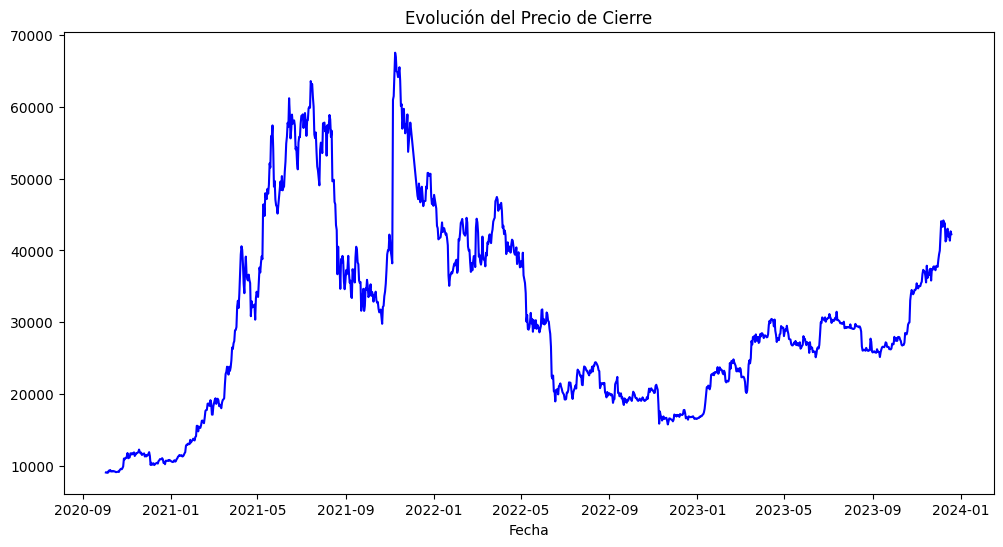

In [9]:
# Ahora representamos la evolución de la variable Close
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Precio de Cierre', color='blue')
plt.title('Evolución del Precio de Cierre')
plt.xlabel('Fecha')

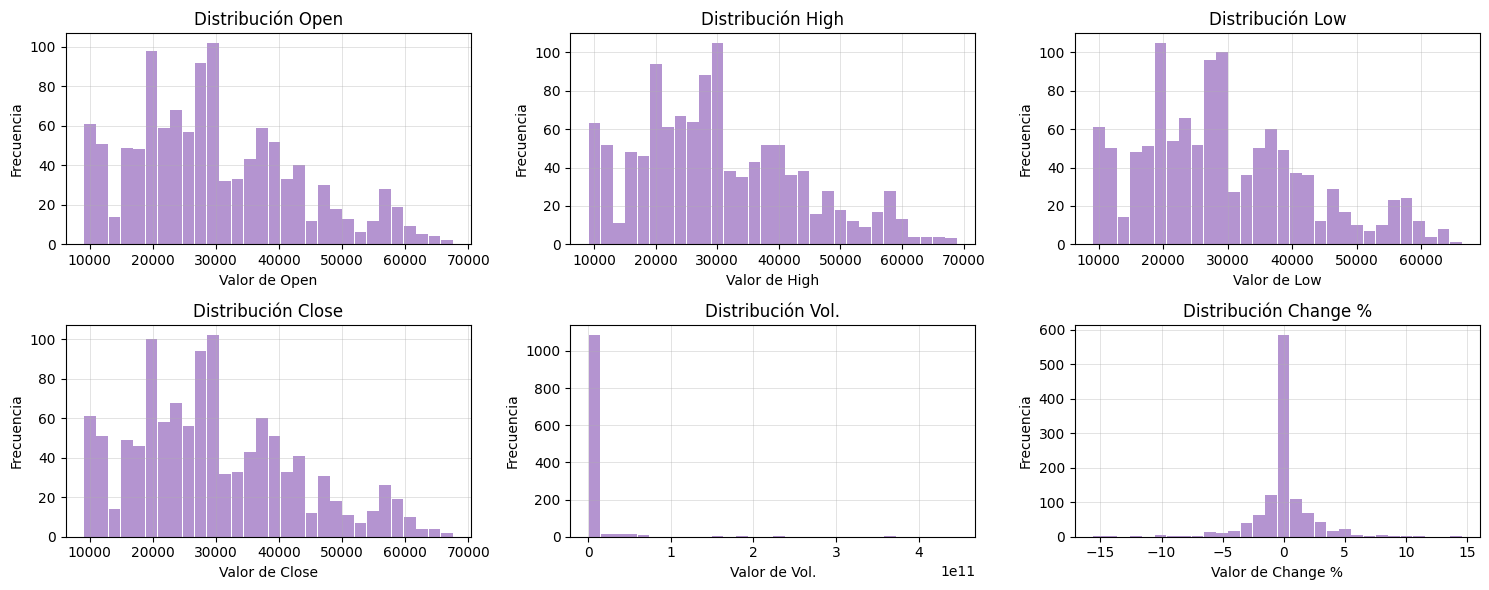

In [10]:
# Y la distribuciones de las variables financieras
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

fin_col = ['Open','High','Low','Close','Vol.','Change %']

for i,col in enumerate(fin_col):
  axes[i//3, i%3].hist(data[col], bins=30, rwidth=0.95, alpha=0.7, color='tab:purple')
  axes[i//3, i%3].set_title(f'Distribución {col}')
  axes[i//3, i%3].set_ylabel('Frecuencia')
  axes[i//3, i%3].set_xlabel(f'Valor de {col}')
  axes[i//3, i%3].grid(True, linestyle='-', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Fecha')

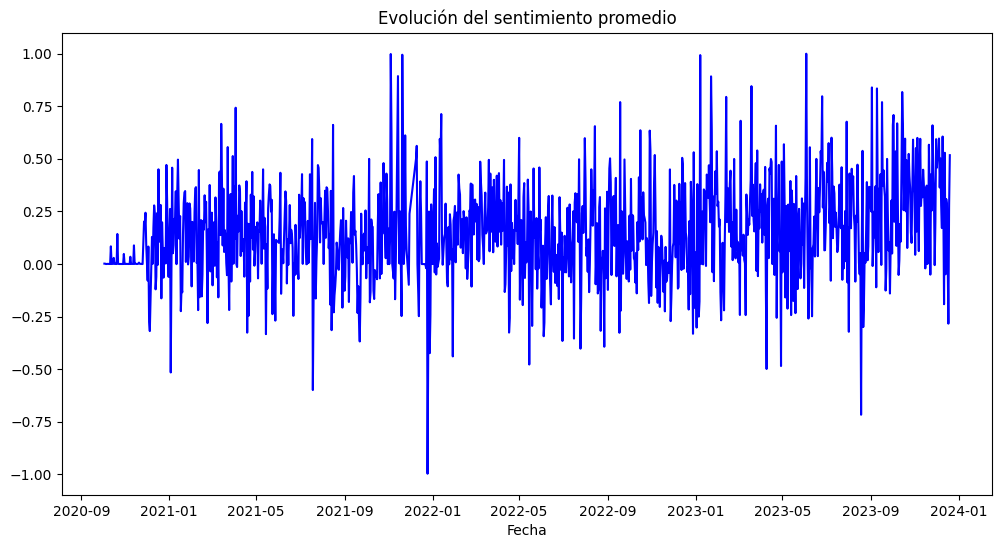

In [11]:
# Replicamos lo mismo con la parte sentimental
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['sent_score'], label='Evolución sentimental', color='blue')
plt.title('Evolución del sentimiento promedio')
plt.xlabel('Fecha')

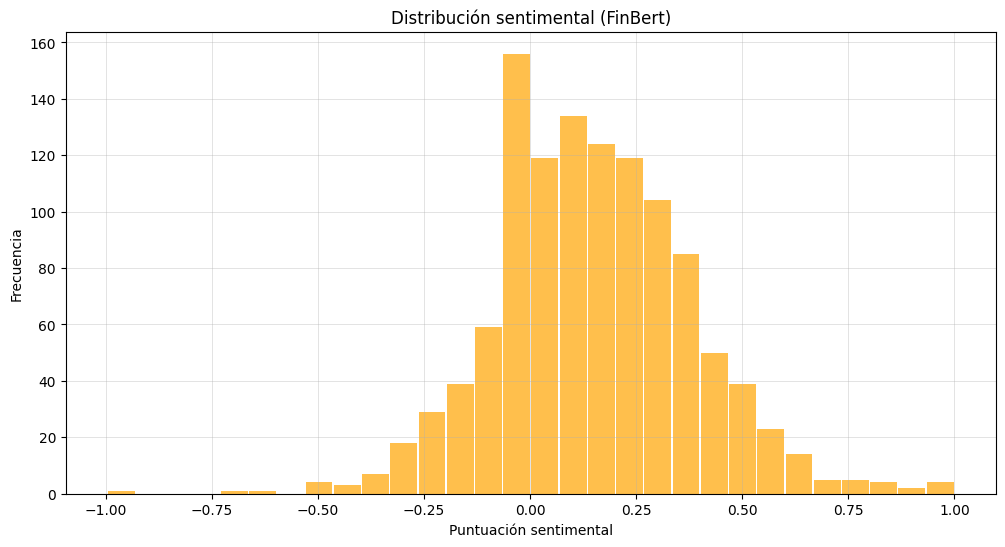

In [12]:
# La distribución sentimental
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(data['sent_score'], bins=30, label='Distribución sentimental', rwidth=0.95, alpha=0.7, color='orange')
plt.title('Distribución sentimental (FinBert)')
plt.xlabel('Puntuación sentimental')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5)
plt.show()

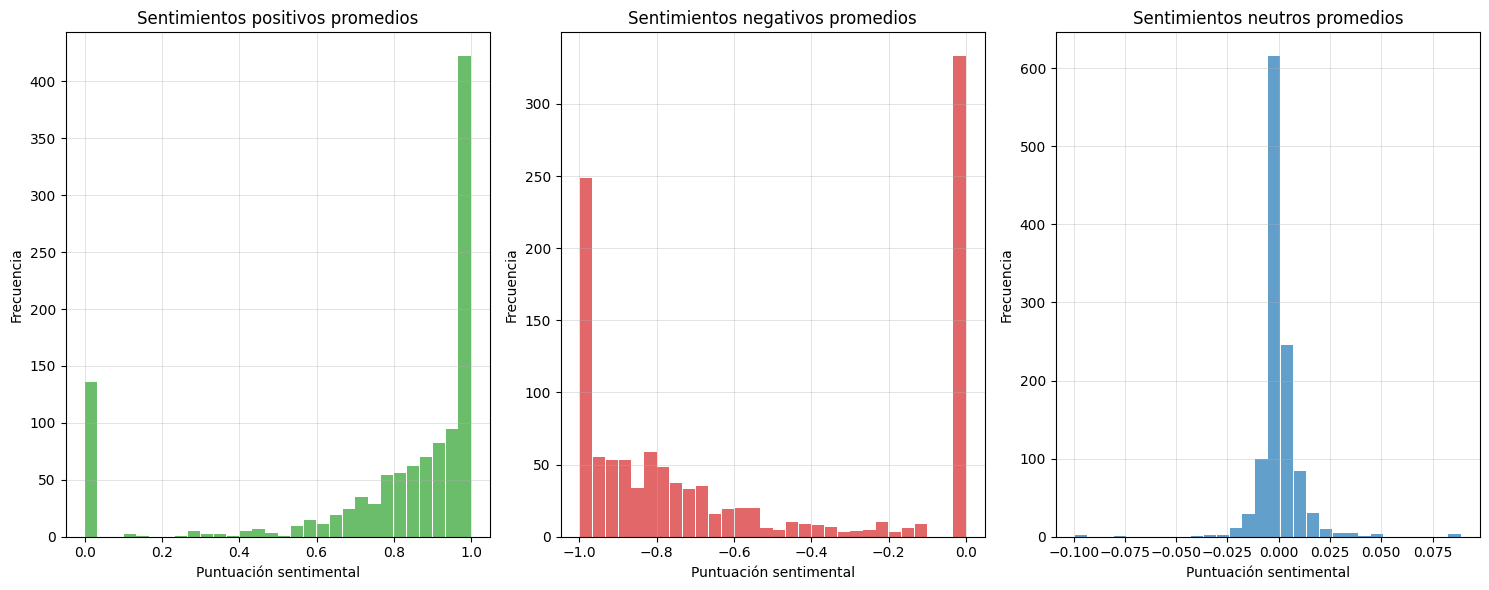

In [13]:
# E incrementamos el nivel de detalle con las medias avg-sent-pos/neg/neutr
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

axes[0].hist(data['avg_sent_pos'], bins=30, rwidth=0.95, alpha=0.7, color='tab:green')
axes[0].set_title('Sentimientos positivos promedios')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xlabel('Puntuación sentimental')
axes[0].grid(True, linestyle='-', linewidth=0.5, alpha=0.5)

axes[1].hist(data['avg_sent_neg'], bins=30, rwidth=0.95, alpha=0.7, color='tab:red')
axes[1].set_title('Sentimientos negativos promedios')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xlabel('Puntuación sentimental')
axes[1].grid(True, linestyle='-', linewidth=0.5, alpha=0.5)

axes[2].hist(data['avg_sent_neutr'], bins=30, rwidth=0.95, alpha=0.7, color='tab:blue')
axes[2].set_title('Sentimientos neutros promedios')
axes[2].set_ylabel('Frecuencia')
axes[2].set_xlabel('Puntuación sentimental')
axes[2].grid(True, linestyle='-', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

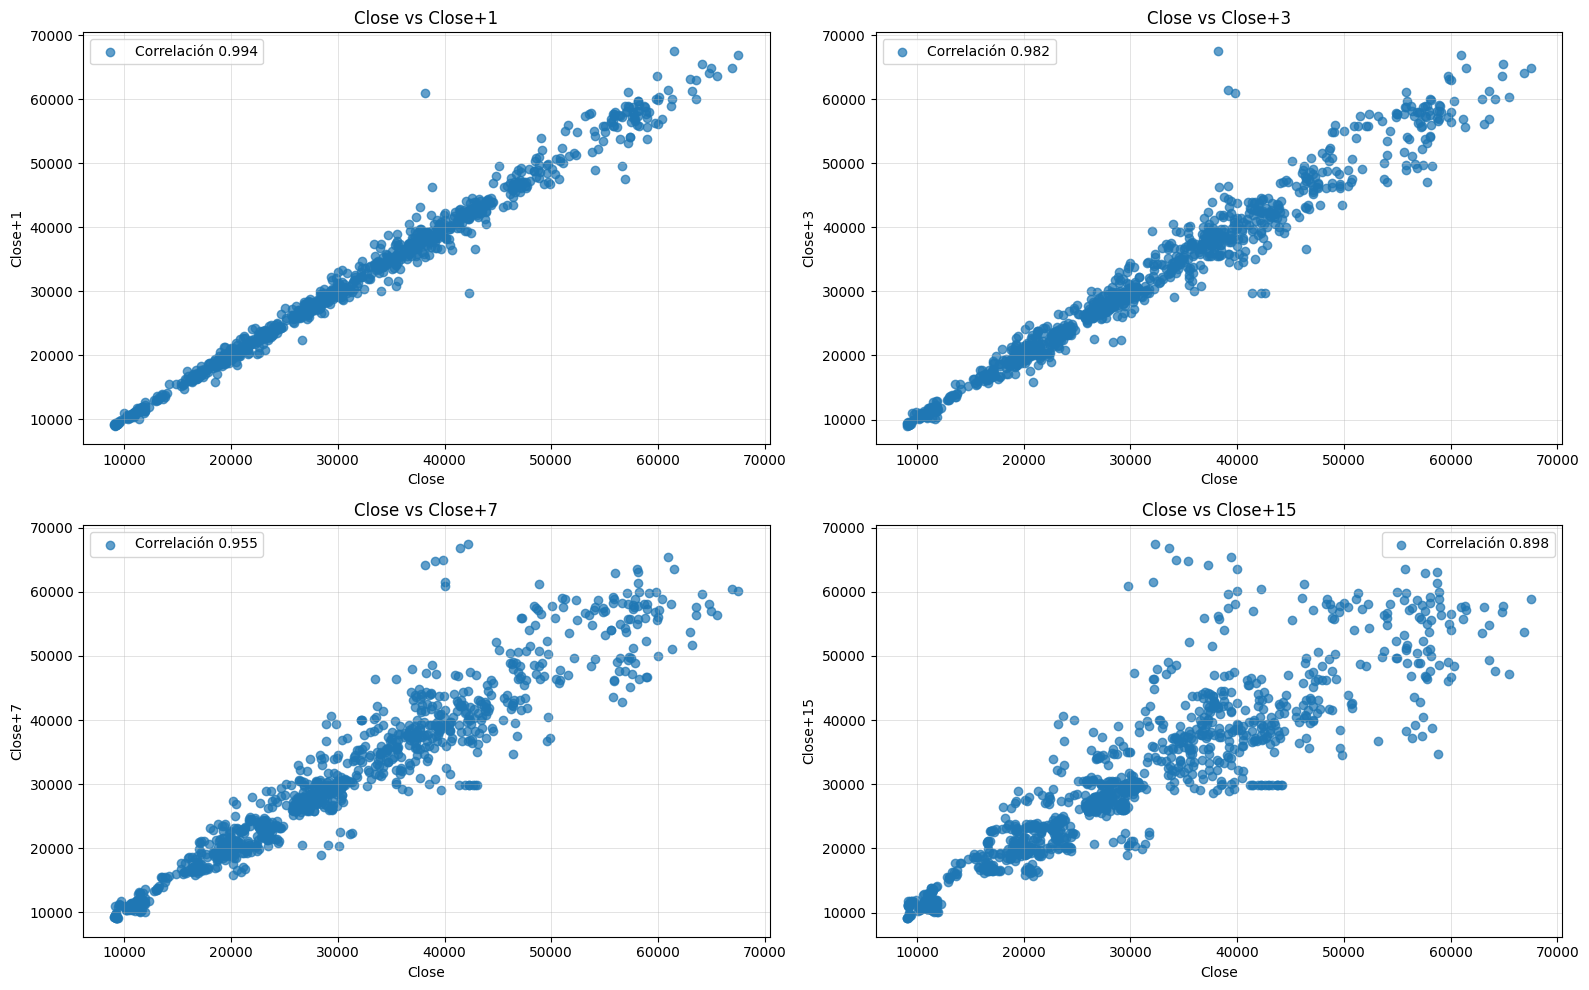

In [17]:
# Para elegir la variable objetivo con la que trabajaremos, comparamos la relación Close vs Close+1/3/7
# Analizaremos la relación lineal entre dichas variables para entender cuál se beneficiaría más de modelos más complejos
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

corr_1 = data['Close'].corr(data['Close+1'])
axes[0,0].scatter(data['Close'], data['Close+1'], alpha=0.7, label=f'Correlación {round(corr_1,3)}')
axes[0,0].set_title('Close vs Close+1')
axes[0,0].set_ylabel('Close+1')
axes[0,0].set_xlabel('Close')
axes[0,0].legend()
axes[0,0].grid(True, linestyle='-', linewidth=0.5, alpha=0.5)

corr_3 = data['Close'].corr(data['Close+3'])
axes[0,1].scatter(data['Close'], data['Close+3'], alpha=0.7, label=f'Correlación {round(corr_3,3)}')
axes[0,1].set_title('Close vs Close+3')
axes[0,1].set_ylabel('Close+3')
axes[0,1].set_xlabel('Close')
axes[0,1].legend()
axes[0,1].grid(True, linestyle='-', linewidth=0.5, alpha=0.5)

corr_7 = data['Close'].corr(data['Close+7'])
axes[1,0].scatter(data['Close'], data['Close+7'], alpha=0.7, label=f'Correlación {round(corr_7,3)}')
axes[1,0].set_title('Close vs Close+7')
axes[1,0].set_ylabel('Close+7')
axes[1,0].set_xlabel('Close')
axes[1,0].legend()
axes[1,0].grid(True, linestyle='-', linewidth=0.5, alpha=0.5)

corr_15 = data['Close'].corr(data['Close+15'])
axes[1,1].scatter(data['Close'], data['Close+15'], alpha=0.7, label=f'Correlación {round(corr_15,3)}')
axes[1,1].set_title('Close vs Close+15')
axes[1,1].set_ylabel('Close+15')
axes[1,1].set_xlabel('Close')
axes[1,1].legend()
axes[1,1].grid(True, linestyle='-', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

/tmp/ipython-input-19-1750933144.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_target.values, y=correlation_target.index, palette='viridis')


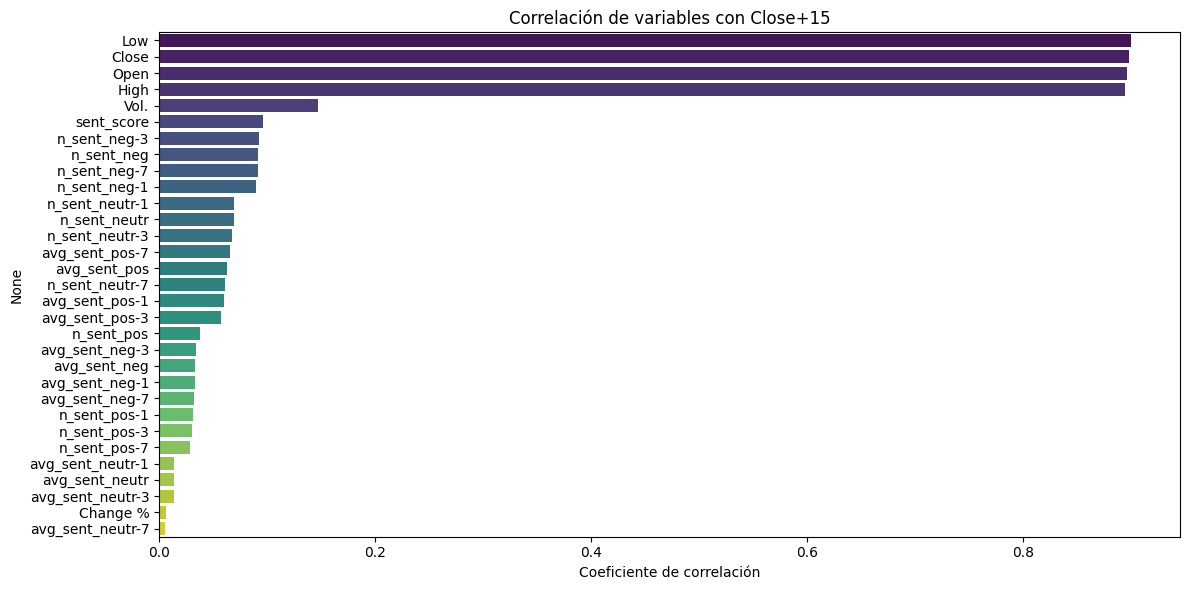

In [19]:
# Análisis de correlaciones con el target
import seaborn as sns
import matplotlib.pyplot as plt

correlation_target = data.corr().abs()['Close+15'].drop(['Close+1','Close+3','Close+7','Close+15']).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_target.values, y=correlation_target.index, palette='viridis')
plt.title('Correlación de variables con Close+15')
plt.xlabel('Coeficiente de correlación')
plt.tight_layout()
plt.show()

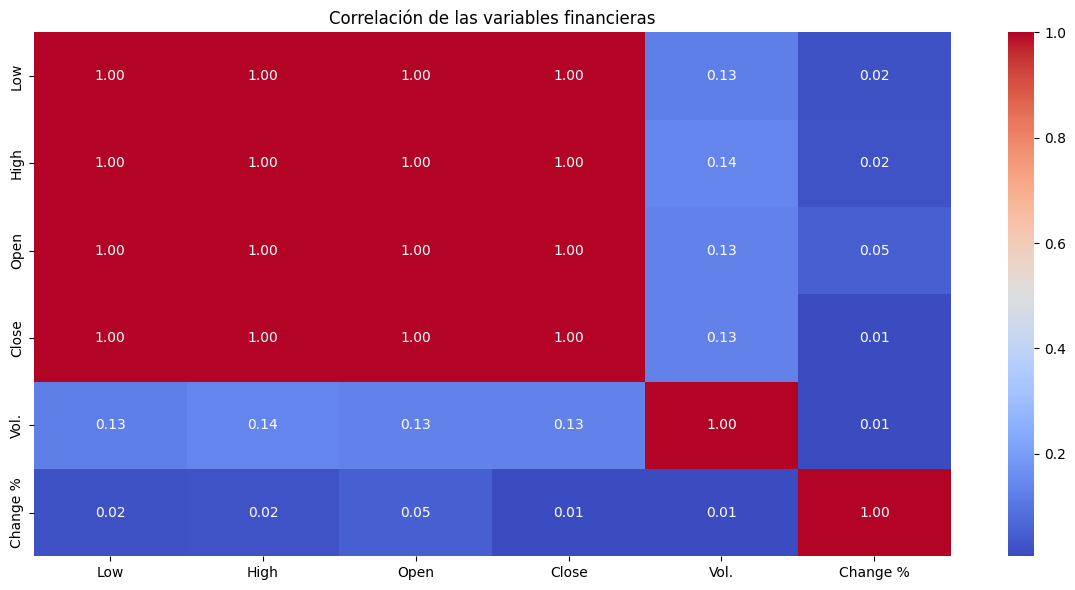

In [20]:
# Análisis correlaciones variables financieras
import seaborn as sns
import matplotlib.pyplot as plt

correlation_target = data[['Low','High','Open','Close','Vol.','Change %']].corr().abs()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de las variables financieras')
plt.tight_layout()
plt.show()

# Creación modelo BiLSTM+ATENTION

### Modelo 1 (LSTM apilado + Fusión adaptativa)

In [1]:
!pip install optuna

[I 2025-06-27 14:52:07,945] A new study created in memory with name: no-name-f5559078-16cf-4ff9-b1cb-f061c524ba81
[I 2025-06-27 14:52:42,059] Trial 0 finished with value: 0.17688007652759552 and parameters: {'time_steps': 60, 'batch_size': 64, 'n_layers_fin': 2, 'fin_units': 64, 'dropout_fin': 0.1, 'recurrent_dropout_fin': 0.0, 'n_layers_sent': 1, 'sent_units': 64, 'dropout_sent': 0.5, 'recurrent_dropout_sent': 0.3, 'dense_units': 64, 'learning_rate': 0.0037480906585077318}. Best is trial 0 with value: 0.17688007652759552.
[I 2025-06-27 14:55:56,291] Trial 1 finished with value: 0.180690199136734 and parameters: {'time_steps': 50, 'batch_size': 128, 'n_layers_fin': 3, 'fin_units': 128, 'dropout_fin': 0.30000000000000004, 'recurrent_dropout_fin': 0.2, 'n_layers_sent': 2, 'sent_units': 128, 'dropout_sent': 0.1, 'recurrent_dropout_sent': 0.1, 'dense_units': 32, 'learning_rate': 0.0016057297066456894}. Best is trial 0 with value: 0.17688007652759552.
[I 2025-06-27 14:58:58,093] Trial 2 fin

Mejores hiperparámetros: {'time_steps': 60, 'batch_size': 32, 'n_layers_fin': 1, 'fin_units': 192, 'dropout_fin': 0.2, 'recurrent_dropout_fin': 0.2, 'n_layers_sent': 3, 'sent_units': 64, 'dropout_sent': 0.30000000000000004, 'recurrent_dropout_sent': 0.0, 'dense_units': 128, 'learning_rate': 0.007034313994721519}
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 468ms/step - loss: 1.0267 - val_loss: 0.2489 - learning_rate: 0.0070
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 309ms/step - loss: 0.6149 - val_loss: 0.1947 - learning_rate: 0.0070
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 410ms/step - loss: 0.5201 - val_loss: 0.1921 - learning_rate: 0.0070
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - loss: 0.4473 - val_loss: 0.2003 - learning_rate: 0.0070
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 414ms/step - loss: 0.4182 - val_loss: 0.2264 - learning_rate: 0.0070
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 346ms/step - loss: 0.4383 - val_loss: 0.1667 - learning_rate: 0.0070
Epoch 7/50
22/22 ━━━━━━━━

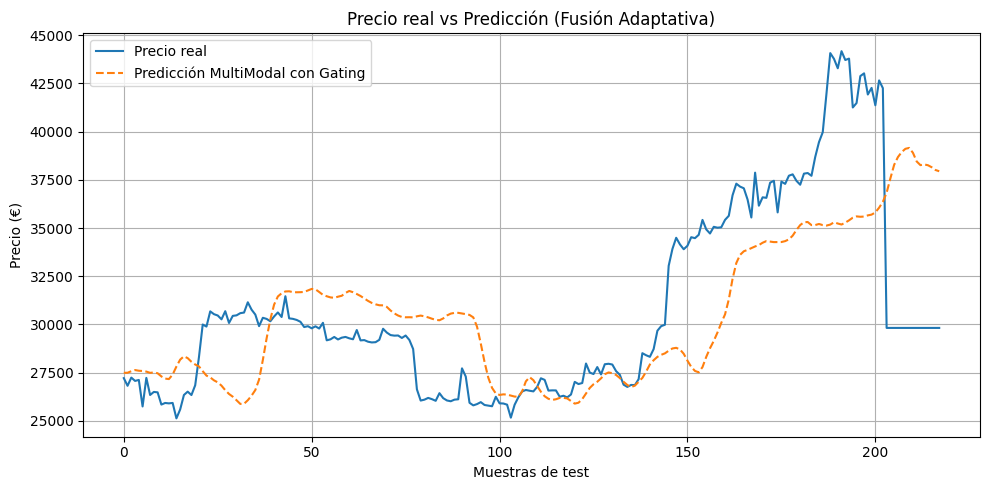

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna

# ======================================================
# 0. CARGA Y PREPROCESADO
# ======================================================
data = pd.read_csv('/content/drive/MyDrive/Dataset-Finbert2.csv', index_col='Date')

data['Close_orig'] = data['Close']
data['Vol_log'] = np.log1p(data['Vol.'])
data['target'] = data['Close+15']
data = data.dropna().reset_index(drop=True)

fin_features = ['Close', 'Vol.', 'Change %']
sent_features = ['n_sent_pos', 'avg_sent_pos', 'n_sent_neg', 'avg_sent_neg', 'n_sent_neutr', 'avg_sent_neutr', 'n_sent_pos-1', 'avg_sent_pos-1', 'n_sent_neg-1', 'avg_sent_neg-1', 'n_sent_neutr-1', 'avg_sent_neutr-1', 'n_sent_pos-3', 'avg_sent_pos-3', 'n_sent_neg-3', 'avg_sent_neg-3', 'n_sent_neutr-3', 'avg_sent_neutr-3', 'n_sent_pos-7', 'avg_sent_pos-7', 'n_sent_neg-7', 'avg_sent_neg-7', 'n_sent_neutr-7', 'avg_sent_neutr-7']

scaler_fin = MinMaxScaler()
data[fin_features] = scaler_fin.fit_transform(data[fin_features])
scaler_sent = MinMaxScaler()
data[sent_features] = scaler_sent.fit_transform(data[sent_features])
scaler_target = StandardScaler()
data[['target']] = scaler_target.fit_transform(data[['target']])

# ======================================================
# 1. GENERAR SECUENCIAS PARA CADA RAMA
# ======================================================
def create_sequences(df, fin_feats, sent_feats, target_col, time_steps=30):
    X_fin, X_sent, y = [], [], []
    for i in range(len(df) - time_steps):
        X_fin.append(df[fin_feats].iloc[i:i+time_steps].values)
        X_sent.append(df[sent_feats].iloc[i:i+time_steps].values)
        y.append(df[target_col].iloc[i+time_steps])
    return np.array(X_fin), np.array(X_sent), np.array(y)

def prepare_data(time_steps):
    X_fin, X_sent, y = create_sequences(data, fin_features, sent_features, 'target', time_steps)
    train_size = int(len(y) * 0.8)
    X_train_fin = X_fin[:train_size]
    X_test_fin  = X_fin[train_size:]
    X_train_sent = X_sent[:train_size]
    X_test_sent  = X_sent[train_size:]
    y_train = y[:train_size]
    y_test  = y[train_size:]
    return X_train_fin, X_train_sent, y_train, X_test_fin, X_test_sent, y_test, train_size

# ======================================================
# 2. CONSTRUCCIÓN DEL MODELO MULTIMODAL CON GATING
# ======================================================
def build_model(trial, time_steps):
    # Hiperparámetros para la rama financiera
    n_layers_fin = trial.suggest_int('n_layers_fin', 1, 3)
    fin_units = trial.suggest_int('fin_units', 64, 256, step=64)
    dropout_fin = trial.suggest_float('dropout_fin', 0.0, 0.5, step=0.1)
    rdrop_fin = trial.suggest_float('recurrent_dropout_fin', 0.0, 0.3, step=0.1)

    # Hiperparámetros para la rama sentimental
    n_layers_sent = trial.suggest_int('n_layers_sent', 1, 3)
    sent_units = trial.suggest_int('sent_units', 32, 128, step=32)
    dropout_sent = trial.suggest_float('dropout_sent', 0.0, 0.5, step=0.1)
    rdrop_sent = trial.suggest_float('recurrent_dropout_sent', 0.0, 0.3, step=0.1)

    # Hiperparámetros para el bloque de fusión
    dense_units = trial.suggest_int('dense_units', 32, 128, step=32)
    lr = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)

    # Rama financiera
    inp_fin = Input(shape=(time_steps, len(fin_features)), name='inp_fin')
    x_fin = inp_fin
    for i in range(n_layers_fin):
        return_seq = True if i < n_layers_fin - 1 else False
        x_fin = LSTM(fin_units, return_sequences=return_seq, recurrent_dropout=rdrop_fin)(x_fin)
        x_fin = Dropout(dropout_fin)(x_fin)

    # Rama sentimental
    inp_sent = Input(shape=(time_steps, len(sent_features)), name='inp_sent')
    x_sent = inp_sent
    for i in range(n_layers_sent):
        return_seq = True if i < n_layers_sent - 1 else False
        x_sent = LSTM(sent_units, return_sequences=return_seq, recurrent_dropout=rdrop_sent)(x_sent)
        x_sent = Dropout(dropout_sent)(x_sent)

    # Proyectamos ambas ramas a un mismo espacio (por ejemplo, de dimensión "dense_units")
    proj_fin = Dense(dense_units, activation='relu')(x_fin)
    proj_sent = Dense(dense_units, activation='relu')(x_sent)

    # Capa de gating: calculamos un peso adaptativo para cada modalidad
    fusion_concat = Concatenate()([proj_fin, proj_sent])
    gate = Dense(dense_units, activation='sigmoid')(fusion_concat)  # Valores entre 0 y 1

    # La fusión adaptativa: cada modalidad se pondera de forma complementaria
    fused = tf.keras.layers.Add()([
        tf.keras.layers.Multiply()([gate, proj_fin]),
        tf.keras.layers.Multiply()([Lambda(lambda x: 1 - x)(gate), proj_sent])
    ])

    # Se puede continuar con capas densas para la predicción final
    fusion_out = Dense(dense_units // 2, activation='relu')(fused)
    fusion_out = Dropout(0.3)(fusion_out)
    out = Dense(1, activation='linear')(fusion_out)

    model = Model([inp_fin, inp_sent], out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mae')
    return model

# ======================================================
# 3. OPTIMIZACIÓN CON OPTUNA
# ======================================================
def objective(trial):
    time_steps = trial.suggest_int('time_steps', 20, 60, step=10)
    X_train_fin, X_train_sent, y_train, X_test_fin, X_test_sent, y_test, _ = prepare_data(time_steps)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    model = build_model(trial, time_steps)
    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

    history = model.fit(
        [X_train_fin, X_train_sent], y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=batch_size,
        callbacks=[es, rlrop],
        verbose=0
    )
    return min(history.history['val_loss'])

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
print("Mejores hiperparámetros:", study.best_params)

# ======================================================
# 4. ENTRENAMIENTO FINAL Y EVALUACIÓN
# ======================================================
best_params = study.best_params
best_time_steps = best_params['time_steps']
X_train_fin, X_train_sent, y_train, X_test_fin, X_test_sent, y_test, _ = prepare_data(best_time_steps)
best_model = build_model(study.best_trial, best_time_steps)

es_final = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
rlrop_final = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

best_model.fit(
    [X_train_fin, X_train_sent], y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=best_params['batch_size'],
    callbacks=[es_final, rlrop_final],
    verbose=1
)

# Predicción y desescalado
preds_scaled = best_model.predict([X_test_fin, X_test_sent]).ravel()
preds_price = scaler_target.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
real_price  = scaler_target.inverse_transform(y_test.reshape(-1, 1)).ravel()

rmse = np.sqrt(mean_squared_error(real_price, preds_price))
mae = mean_absolute_error(real_price, preds_price)
print(f"RMSE en test (EUR): {rmse:.2f}")
print(f"MAE  en test (EUR): {mae:.2f}")

plt.figure(figsize=(10, 5))
plt.plot(real_price, label='Precio real')
plt.plot(preds_price, '--', label='Predicción MultiModal con Gating')
plt.title('Precio real vs Predicción (Fusión Adaptativa)')
plt.xlabel('Muestras de test')
plt.ylabel('Precio (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step
RMSE en entrenamiento (EUR): 6729.67
MAE  en entrenamiento (EUR): 4391.79


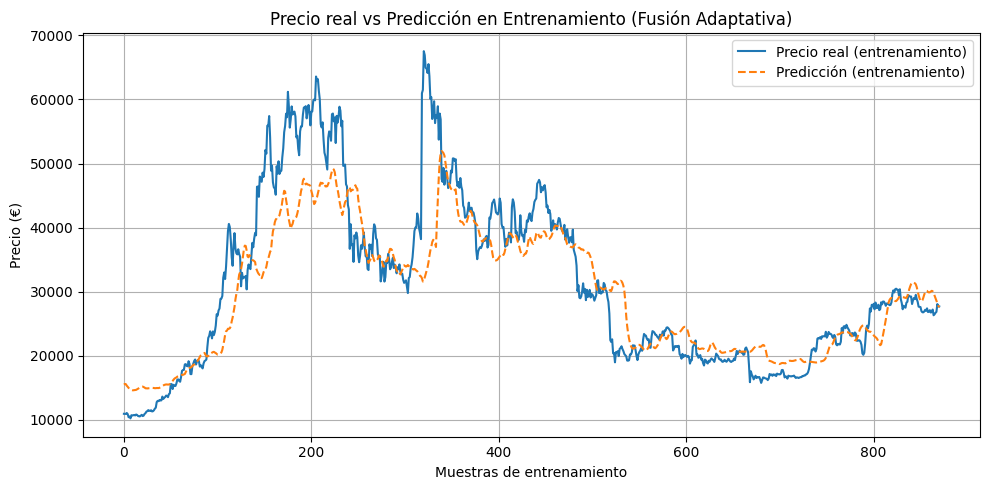

In [9]:
# ======================================================
# 6. PREDICCIÓN Y VISUALIZACIÓN EN ENTRENAMIENTO
# ======================================================
# Predicción en entrenamiento
preds_train_scaled = best_model.predict([X_train_fin, X_train_sent]).ravel()
preds_train_price = scaler_target.inverse_transform(preds_train_scaled.reshape(-1, 1)).ravel()
real_train_price  = scaler_target.inverse_transform(y_train.reshape(-1, 1)).ravel()

# Métricas en entrenamiento
rmse_train = np.sqrt(mean_squared_error(real_train_price, preds_train_price))
mae_train = mean_absolute_error(real_train_price, preds_train_price)
print(f"RMSE en entrenamiento (EUR): {rmse_train:.2f}")
print(f"MAE  en entrenamiento (EUR): {mae_train:.2f}")

# Gráfica: Real vs Predicción en entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(real_train_price, label='Precio real (entrenamiento)')
plt.plot(preds_train_price, '--', label='Predicción (entrenamiento)')
plt.title('Precio real vs Predicción en Entrenamiento (Fusión Adaptativa)')
plt.xlabel('Muestras de entrenamiento')
plt.ylabel('Precio (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


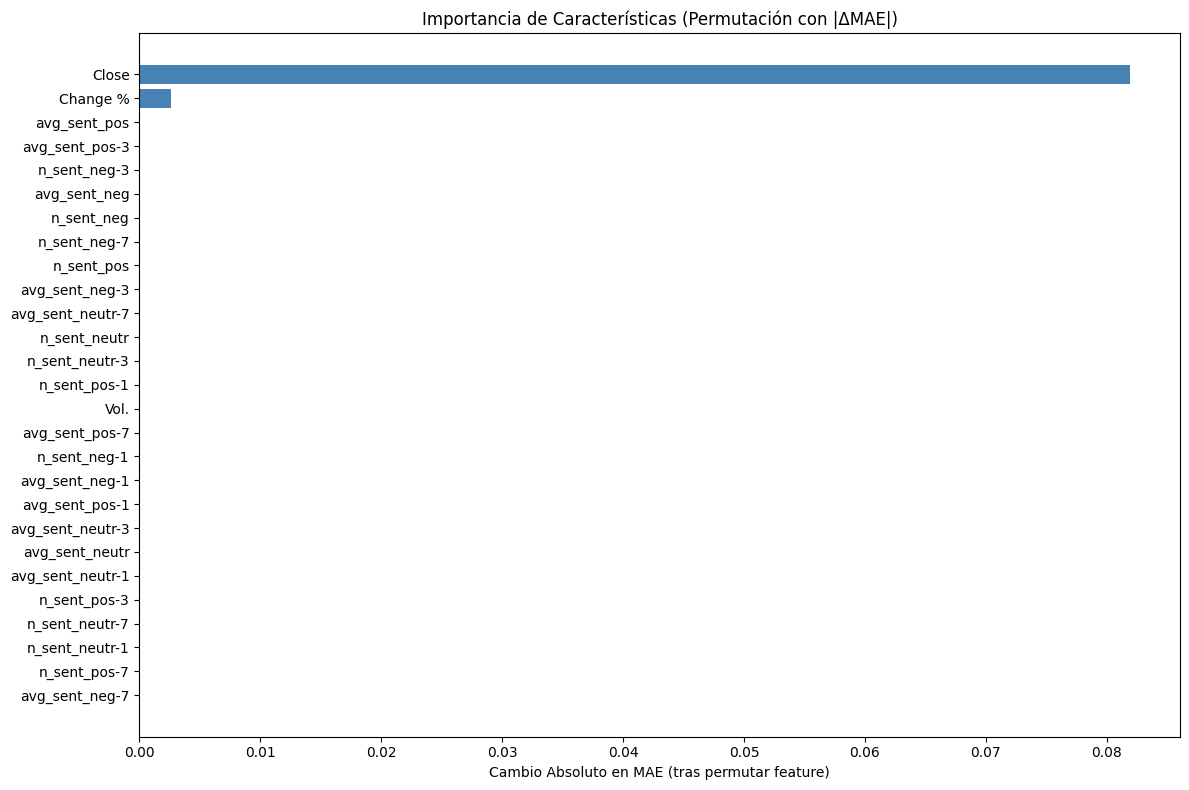


Importancia (ordenada por impacto absoluto):
 1. Close                     | Tipo: Financiera  | |Δ MAE|: 0.081970
 3. Change %                  | Tipo: Financiera  | |Δ MAE|: 0.002622
 5. avg_sent_pos              | Tipo: Sentimental | |Δ MAE|: 0.000001
17. avg_sent_pos-3            | Tipo: Sentimental | |Δ MAE|: 0.000001
18. n_sent_neg-3              | Tipo: Sentimental | |Δ MAE|: 0.000000
 7. avg_sent_neg              | Tipo: Sentimental | |Δ MAE|: 0.000000
 6. n_sent_neg                | Tipo: Sentimental | |Δ MAE|: 0.000000
24. n_sent_neg-7              | Tipo: Sentimental | |Δ MAE|: 0.000000
 4. n_sent_pos                | Tipo: Sentimental | |Δ MAE|: 0.000000
19. avg_sent_neg-3            | Tipo: Sentimental | |Δ MAE|: 0.000000
27. avg_sent_neutr-7          | Tipo: Sentimental | |Δ MAE|: 0.000000
 8. n_sent_neutr              | Tipo: Sentimental | |Δ MAE|: 0.000000
20. n_sent_neutr-3            | Tipo: Sentimental | |Δ MAE|: 0.000000
10. n_sent_pos-1              | Tipo: Sentim

In [10]:
# Explicabilidad por permutación para modelo multimodal con ramas financiera y sentimental.
# Calcula la importancia de cada feature como el aumento del error tras permutarla.
def aggregate_permutation_importance(model, X_test_fin, X_test_sent, y_test, fin_features, sent_features):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    # Evaluación base
    baseline_error = model.evaluate([X_test_fin, X_test_sent], y_test, verbose=0)

    importances = []

    # Permutación para features financieras
    for i, feature_name in enumerate(fin_features):
        X_permuted_fin = X_test_fin.copy()
        X_permuted_fin[:, :, i] = np.random.permutation(X_permuted_fin[:, :, i].flatten()).reshape(X_permuted_fin[:, :, i].shape)

        permuted_error = model.evaluate([X_permuted_fin, X_test_sent], y_test, verbose=0)
        importance = abs(permuted_error - baseline_error)
        importances.append((feature_name, importance, 'Financiera'))

    # Permutación para features sentimentales
    for i, feature_name in enumerate(sent_features):
        X_permuted_sent = X_test_sent.copy()
        X_permuted_sent[:, :, i] = np.random.permutation(X_permuted_sent[:, :, i].flatten()).reshape(X_permuted_sent[:, :, i].shape)

        permuted_error = model.evaluate([X_test_fin, X_permuted_sent], y_test, verbose=0)
        importance = abs(permuted_error - baseline_error)
        importances.append((feature_name, importance, 'Sentimental'))

    # Crear DataFrame ordenado por importancia
    importance_df = pd.DataFrame(importances, columns=['Feature', 'Importance', 'Tipo']).sort_values('Importance', ascending=False)

    # Visualización
    plt.figure(figsize=(12, 8))
    colors = importance_df['Tipo'].map({'Financiera': 'steelblue', 'Sentimental': 'indianred'})
    plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
    plt.xlabel('Cambio Absoluto en MAE (tras permutar feature)')
    plt.title('Importancia de Características (Permutación con |ΔMAE|)')
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Mostrar resultados en consola
    print("\nImportancia (ordenada por impacto absoluto):")
    for i, row in importance_df.iterrows():
        print(f"{i+1:2d}. {row['Feature']:<25} | Tipo: {row['Tipo']:<11} | |Δ MAE|: {row['Importance']:.6f}")

    return importance_df


importance_df = aggregate_permutation_importance(
    model=best_model,
    X_test_fin=X_test_fin,
    X_test_sent=X_test_sent,
    y_test=y_test,
    fin_features=fin_features,
    sent_features=sent_features
)


### Modelo 2 (LSTM apilado + Attention + Fusión adaptativa)

In [1]:
!pip install optuna

[I 2025-06-27 17:47:32,716] A new study created in memory with name: no-name-04e05c12-a92e-4ef3-a79d-e765b4ddb9ea
[I 2025-06-27 17:48:45,852] Trial 0 finished with value: 0.2222227305173874 and parameters: {'time_steps': 60, 'batch_size': 128, 'n_layers_fin': 1, 'fin_units': 64, 'dropout_fin': 0.2, 'recurrent_dropout_fin': 0.2, 'n_layers_sent': 1, 'sent_units': 32, 'dropout_sent': 0.30000000000000004, 'recurrent_dropout_sent': 0.2, 'dense_units': 128, 'learning_rate': 0.000383469401575331}. Best is trial 0 with value: 0.2222227305173874.
[I 2025-06-27 17:50:19,118] Trial 1 finished with value: 0.19492195546627045 and parameters: {'time_steps': 30, 'batch_size': 64, 'n_layers_fin': 3, 'fin_units': 64, 'dropout_fin': 0.4, 'recurrent_dropout_fin': 0.1, 'n_layers_sent': 1, 'sent_units': 128, 'dropout_sent': 0.4, 'recurrent_dropout_sent': 0.1, 'dense_units': 32, 'learning_rate': 0.0006360500527460701}. Best is trial 1 with value: 0.19492195546627045.
[I 2025-06-27 17:51:41,891] Trial 2 fini

Mejores hiperparámetros: {'time_steps': 20, 'batch_size': 64, 'n_layers_fin': 1, 'fin_units': 64, 'dropout_fin': 0.4, 'recurrent_dropout_fin': 0.2, 'n_layers_sent': 1, 'sent_units': 64, 'dropout_sent': 0.0, 'recurrent_dropout_sent': 0.1, 'dense_units': 128, 'learning_rate': 0.0003923839273586787}
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - loss: 1.0020 - val_loss: 0.5991 - learning_rate: 3.9238e-04
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.9168 - val_loss: 0.5791 - learning_rate: 3.9238e-04
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.8260 - val_loss: 0.4372 - learning_rate: 3.9238e-04
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.7061 - val_loss: 0.2024 - learning_rate: 3.9238e-04
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.4722 - val_loss: 0.3371 - learning_rate: 3.9238e-04
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.4736 - val_loss: 0.2263 - learning_rate: 3.9238e-04
Epoch 7/50
12/12 ━━

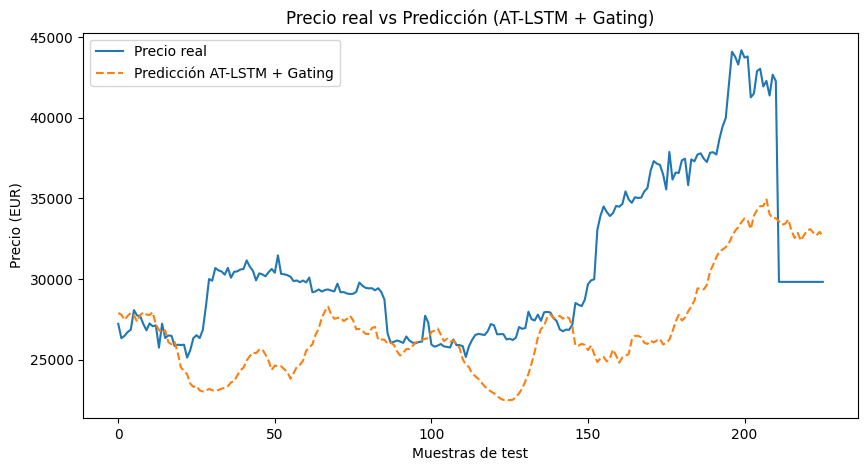

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate, Layer, Lambda, Multiply, Add
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import optuna
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# ============================
# DATA PREPARATION
# ============================

# Cargar y preparar los datos
data = pd.read_csv('/content/drive/MyDrive/Dataset-Finbert2.csv', index_col='Date')

data['Close_orig'] = data['Close']
data['Vol_log'] = np.log1p(data['Vol.'])
data['target'] = data['Close+15']
data = data.dropna().reset_index(drop=True)

fin_features = ['Close', 'Vol.', 'Change %']
sent_features = ['n_sent_pos', 'avg_sent_pos', 'n_sent_neg', 'avg_sent_neg', 'n_sent_neutr', 'avg_sent_neutr', 'n_sent_pos-1', 'avg_sent_pos-1', 'n_sent_neg-1', 'avg_sent_neg-1', 'n_sent_neutr-1', 'avg_sent_neutr-1', 'n_sent_pos-3', 'avg_sent_pos-3', 'n_sent_neg-3', 'avg_sent_neg-3', 'n_sent_neutr-3', 'avg_sent_neutr-3', 'n_sent_pos-7', 'avg_sent_pos-7', 'n_sent_neg-7', 'avg_sent_neg-7', 'n_sent_neutr-7', 'avg_sent_neutr-7']


scaler_fin = MinMaxScaler()
data[fin_features] = scaler_fin.fit_transform(data[fin_features])

scaler_sent = MinMaxScaler()
data[sent_features] = scaler_sent.fit_transform(data[sent_features])

scaler_target = StandardScaler()
data[['target']] = scaler_target.fit_transform(data[['target']])

# Secuencias
def create_sequences(df, fin_feats, sent_feats, target_col, time_steps):
    X_fin, X_sent, y = [], [], []
    for i in range(len(df) - time_steps):
        X_fin.append(df[fin_feats].iloc[i:i+time_steps].values)
        X_sent.append(df[sent_feats].iloc[i:i+time_steps].values)
        y.append(df[target_col].iloc[i+time_steps])
    return np.array(X_fin), np.array(X_sent), np.array(y)

def prepare_data(time_steps):
    X_fin, X_sent, y = create_sequences(data, fin_features, sent_features, 'target', time_steps)
    train_size = int(len(y) * 0.8)
    X_train_fin = X_fin[:train_size]
    X_test_fin  = X_fin[train_size:]
    X_train_sent = X_sent[:train_size]
    X_test_sent  = X_sent[train_size:]
    y_train = y[:train_size]
    y_test  = y[train_size:]
    return X_train_fin, X_train_sent, y_train, X_test_fin, X_test_sent, y_test

# ============================
# ATTENTION LAYER
# ============================

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        hidden_dim = input_shape[-1]
        self.W = self.add_weight(shape=(hidden_dim, hidden_dim),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(hidden_dim,),
                                 initializer='zeros',
                                 trainable=True)
        self.u = self.add_weight(shape=(hidden_dim, 1),
                                 initializer='random_normal',
                                 trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        v = tf.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        vu = tf.tensordot(v, self.u, axes=1)
        scores = tf.nn.softmax(tf.squeeze(vu, -1), axis=1)
        output = tf.reduce_sum(x * tf.expand_dims(scores, -1), axis=1)
        return output

# ============================
# BUILD MODEL
# ============================

def build_model(trial, time_steps):
    # Hiperparámetros rama financiera
    n_layers_fin = trial.suggest_int('n_layers_fin', 1, 3)
    fin_units = trial.suggest_int('fin_units', 64, 256, step=64)
    dropout_fin = trial.suggest_float('dropout_fin', 0.0, 0.5, step=0.1)
    rdrop_fin = trial.suggest_float('recurrent_dropout_fin', 0.0, 0.3, step=0.1)

    # Hiperparámetros rama sentimental
    n_layers_sent = trial.suggest_int('n_layers_sent', 1, 3)
    sent_units = trial.suggest_int('sent_units', 32, 128, step=32)
    dropout_sent = trial.suggest_float('dropout_sent', 0.0, 0.5, step=0.1)
    rdrop_sent = trial.suggest_float('recurrent_dropout_sent', 0.0, 0.3, step=0.1)

    # Bloque de fusión
    dense_units = trial.suggest_int('dense_units', 32, 128, step=32)
    lr = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)

    # Rama financiera
    inp_fin = Input(shape=(time_steps, len(fin_features)), name='inp_fin')
    x_fin = inp_fin
    for i in range(n_layers_fin):
        return_seq = True
        x_fin = LSTM(fin_units, return_sequences=return_seq, recurrent_dropout=rdrop_fin)(x_fin)
        x_fin = Dropout(dropout_fin)(x_fin)
    x_fin_att = AttentionLayer()(x_fin)
    proj_fin = Dense(dense_units, activation='relu')(x_fin_att)

    # Rama sentimental
    inp_sent = Input(shape=(time_steps, len(sent_features)), name='inp_sent')
    x_sent = inp_sent
    for i in range(n_layers_sent):
        return_seq = True
        x_sent = LSTM(sent_units, return_sequences=return_seq, recurrent_dropout=rdrop_sent)(x_sent)
        x_sent = Dropout(dropout_sent)(x_sent)
    x_sent_att = AttentionLayer()(x_sent)
    proj_sent = Dense(dense_units, activation='relu')(x_sent_att)

    # Gating
    fusion_concat = Concatenate()([proj_fin, proj_sent])
    gate = Dense(dense_units, activation='sigmoid')(fusion_concat)

    fused = Add()([
        Multiply()([gate, proj_fin]),
        Multiply()([Lambda(lambda x: 1 - x)(gate), proj_sent])
    ])

    fusion_out = Dense(dense_units // 2, activation='relu')(fused)
    fusion_out = Dropout(0.3)(fusion_out)
    out = Dense(1, activation='linear')(fusion_out)

    model = Model([inp_fin, inp_sent], out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mae')
    return model

# ============================
# OPTUNA OBJECTIVE
# ============================

def objective(trial):
    time_steps = trial.suggest_int('time_steps', 20, 60, step=10)
    X_train_fin, X_train_sent, y_train, X_test_fin, X_test_sent, y_test = prepare_data(time_steps)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    model = build_model(trial, time_steps)

    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

    history = model.fit(
        [X_train_fin, X_train_sent], y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=batch_size,
        callbacks=[es, rlrop],
        verbose=0
    )
    return min(history.history['val_loss'])

# ============================
# OPTIMIZE
# ============================

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
print("Mejores hiperparámetros:", study.best_params)

# ============================
# FINAL TRAINING & EVALUATION
# ============================

best_params = study.best_params
best_time_steps = best_params['time_steps']
X_train_fin, X_train_sent, y_train, X_test_fin, X_test_sent, y_test = prepare_data(best_time_steps)
best_model = build_model(study.best_trial, best_time_steps)

es_final = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
rlrop_final = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

best_model.fit(
    [X_train_fin, X_train_sent], y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=best_params['batch_size'],
    callbacks=[es_final, rlrop_final],
    verbose=1
)

# Predicción y desescalado
preds_scaled = best_model.predict([X_test_fin, X_test_sent]).ravel()
preds_price = scaler_target.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
real_price  = scaler_target.inverse_transform(y_test.reshape(-1, 1)).ravel()

rmse = np.sqrt(mean_squared_error(real_price, preds_price))
mae = mean_absolute_error(real_price, preds_price)
print(f"RMSE en test (EUR): {rmse:.2f}")
print(f"MAE  en test (EUR): {mae:.2f}")

plt.figure(figsize=(10, 5))
plt.plot(real_price, label='Precio real')
plt.plot(preds_price, '--', label='Predicción AT-LSTM + Gating')
plt.title('Precio real vs Predicción (AT-LSTM + Gating)')
plt.xlabel('Muestras de test')
plt.ylabel('Precio (EUR)')
plt.legend()
plt.show()


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
RMSE en entrenamiento (EUR): 7820.89
MAE  en entrenamiento (EUR): 5579.18


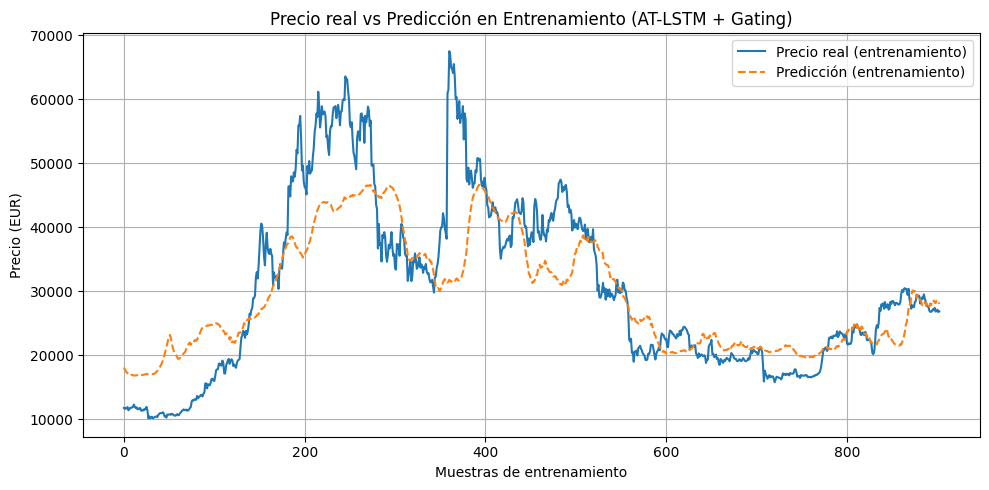

In [3]:
# ======================================================
# PREDICCIÓN Y VISUALIZACIÓN EN ENTRENAMIENTO
# ======================================================
# Predicción en entrenamiento
preds_train_scaled = best_model.predict([X_train_fin, X_train_sent]).ravel()
preds_train_price = scaler_target.inverse_transform(preds_train_scaled.reshape(-1, 1)).ravel()
real_train_price  = scaler_target.inverse_transform(y_train.reshape(-1, 1)).ravel()

# Métricas en entrenamiento
rmse_train = np.sqrt(mean_squared_error(real_train_price, preds_train_price))
mae_train = mean_absolute_error(real_train_price, preds_train_price)
print(f"RMSE en entrenamiento (EUR): {rmse_train:.2f}")
print(f"MAE  en entrenamiento (EUR): {mae_train:.2f}")

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(real_train_price, label='Precio real (entrenamiento)')
plt.plot(preds_train_price, '--', label='Predicción (entrenamiento)')
plt.title('Precio real vs Predicción en Entrenamiento (AT-LSTM + Gating)')
plt.xlabel('Muestras de entrenamiento')
plt.ylabel('Precio (EUR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8/8 ━━━━━━━━

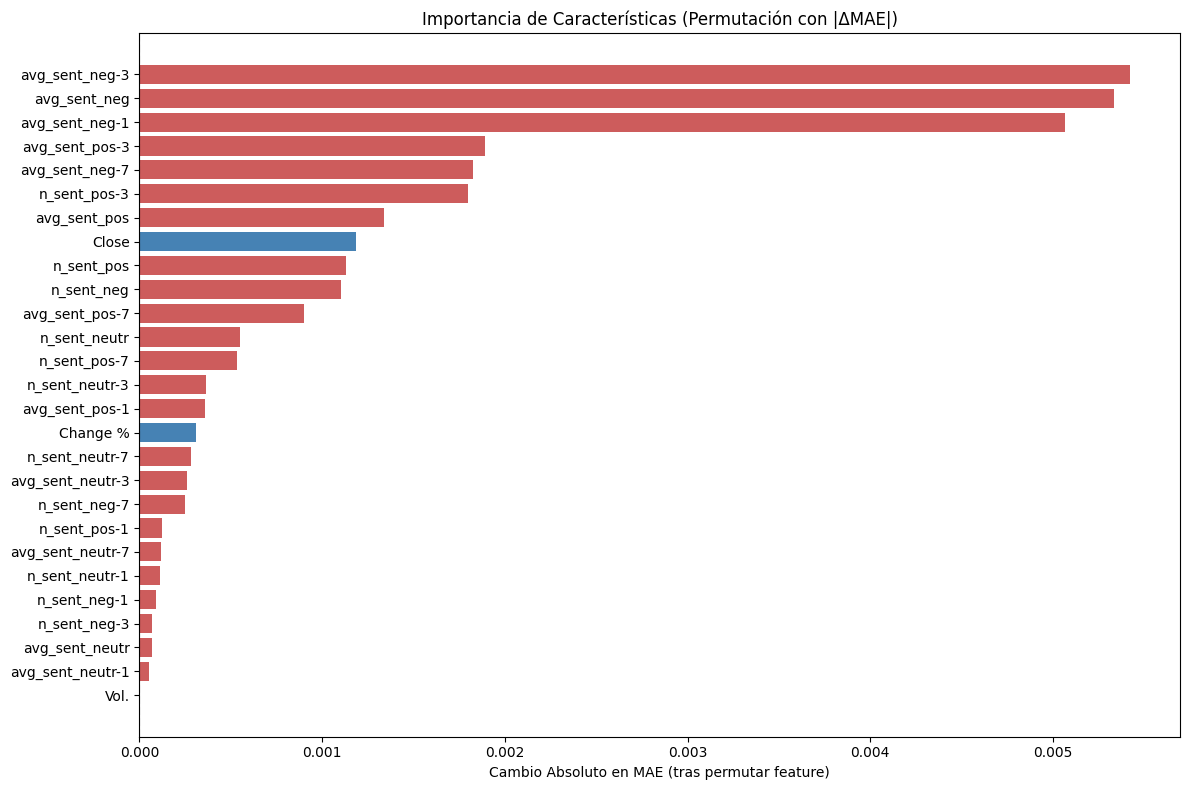


Importancia (ordenada por impacto absoluto):
19. avg_sent_neg-3            | Tipo: Sentimental | |Δ MAE|: 0.005424
 7. avg_sent_neg              | Tipo: Sentimental | |Δ MAE|: 0.005334
13. avg_sent_neg-1            | Tipo: Sentimental | |Δ MAE|: 0.005066
17. avg_sent_pos-3            | Tipo: Sentimental | |Δ MAE|: 0.001889
25. avg_sent_neg-7            | Tipo: Sentimental | |Δ MAE|: 0.001825
16. n_sent_pos-3              | Tipo: Sentimental | |Δ MAE|: 0.001798
 5. avg_sent_pos              | Tipo: Sentimental | |Δ MAE|: 0.001340
 1. Close                     | Tipo: Financiera  | |Δ MAE|: 0.001185
 4. n_sent_pos                | Tipo: Sentimental | |Δ MAE|: 0.001129
 6. n_sent_neg                | Tipo: Sentimental | |Δ MAE|: 0.001103
23. avg_sent_pos-7            | Tipo: Sentimental | |Δ MAE|: 0.000903
 8. n_sent_neutr              | Tipo: Sentimental | |Δ MAE|: 0.000549
22. n_sent_pos-7              | Tipo: Sentimental | |Δ MAE|: 0.000532
20. n_sent_neutr-3            | Tipo: Sentim

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def aggregate_permutation_importance(model, X_test_fin, X_test_sent, y_test, fin_features, sent_features):
    """
    Explicabilidad por permutación (valor absoluto del impacto en MAE) para modelo AT-LSTM + Gating.
    """
    # Evaluación base
    baseline_preds = model.predict([X_test_fin, X_test_sent]).ravel()
    baseline_error = np.mean(np.abs(baseline_preds - y_test))

    importances = []

    # Permutación para features financieras
    for i, feature_name in enumerate(fin_features):
        X_permuted_fin = X_test_fin.copy()
        flat_values = X_permuted_fin[:, :, i].flatten()
        np.random.shuffle(flat_values)
        X_permuted_fin[:, :, i] = flat_values.reshape(X_permuted_fin[:, :, i].shape)

        permuted_preds = model.predict([X_permuted_fin, X_test_sent]).ravel()
        permuted_error = np.mean(np.abs(permuted_preds - y_test))
        importance = abs(permuted_error - baseline_error)
        importances.append((feature_name, importance, 'Financiera'))

    # Permutación para features sentimentales
    for i, feature_name in enumerate(sent_features):
        X_permuted_sent = X_test_sent.copy()
        flat_values = X_permuted_sent[:, :, i].flatten()
        np.random.shuffle(flat_values)
        X_permuted_sent[:, :, i] = flat_values.reshape(X_permuted_sent[:, :, i].shape)

        permuted_preds = model.predict([X_test_fin, X_permuted_sent]).ravel()
        permuted_error = np.mean(np.abs(permuted_preds - y_test))
        importance = abs(permuted_error - baseline_error)
        importances.append((feature_name, importance, 'Sentimental'))

    # Crear DataFrame ordenado por importancia
    importance_df = pd.DataFrame(importances, columns=['Feature', 'Importance', 'Tipo']).sort_values('Importance', ascending=False)

    # Visualización
    plt.figure(figsize=(12, 8))
    colors = importance_df['Tipo'].map({'Financiera': 'steelblue', 'Sentimental': 'indianred'})
    plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
    plt.xlabel('Cambio Absoluto en MAE (tras permutar feature)')
    plt.title('Importancia de Características (Permutación con |ΔMAE|)')
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Mostrar resultados en consola
    print("\nImportancia (ordenada por impacto absoluto):")
    for i, row in importance_df.iterrows():
        print(f"{i+1:2d}. {row['Feature']:<25} | Tipo: {row['Tipo']:<11} | |Δ MAE|: {row['Importance']:.6f}")

    return importance_df

importance_df = aggregate_permutation_importance(
    model=best_model,
    X_test_fin=X_test_fin,
    X_test_sent=X_test_sent,
    y_test=y_test,
    fin_features=fin_features,
    sent_features=sent_features
)

# Evaluación y Comparación

### ARIMA

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 17.8 MB/s eta 0:00:00


[I 2025-06-23 16:46:42,240] A new study created in memory with name: no-name-418c3fde-39a8-453e-8b60-782a72a0af31
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2025-06-23 16:46:44,841] Trial 0 finished with value: 18527205.439256407 and parameters: {'p': 4, 'd': 2, 'q': 5}. Best is trial 0 with value: 18527205.439256407.
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2025-06-23 16:46:48,162] Trial 1 finished with value: 24668042.029224604 and parameters: {'p': 5, 'd': 0, 'q': 3}. Best is trial 0 with value: 18527205.439256407.
[I 2025-06-23 16:46:54,620] Trial 2 finished with value: 25878608.428330645 and parameters: {'p': 2, 'd': 1, '

Mejores parámetros ARIMA: {'p': 4, 'd': 2, 'q': 1}
RMSE precios ARIMA: 4230.6058
MAE precios ARIMA: 3462.1279


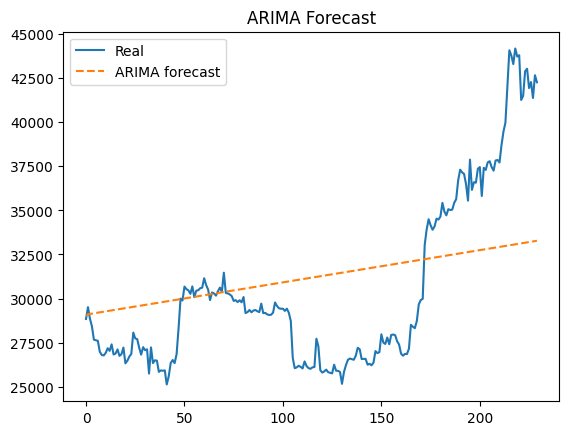

In [ ]:
import numpy as np
import pandas as pd
import optuna
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Dataset-Finbert2.csv', index_col='Date')

series = data['Close'].values

# Separar train/test
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Función objetivo para Optuna
def objective(trial):
    p = trial.suggest_int("p", 0, 5)
    d = trial.suggest_int("d", 0, 2)
    q = trial.suggest_int("q", 0, 5)

    try:
        model = ARIMA(train, order=(p, d, q))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test))
        error = mean_squared_error(test, forecast)
        return error
    except:
        return float('inf')  # Penalizar combinaciones inválidas

# Ejecutar búsqueda
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Mostrar mejor resultado
print("Mejores parámetros ARIMA:", study.best_params)

# Entrenar el modelo final
best_p, best_d, best_q = study.best_params['p'], study.best_params['d'], study.best_params['q']
final_model = ARIMA(train, order=(best_p, best_d, best_q)).fit()
forecast = final_model.forecast(steps=len(test))

rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
print(f"RMSE precios ARIMA: {rmse:.4f}")
print(f"MAE precios ARIMA: {mae:.4f}")

# Graficar resultados
plt.plot(range(len(test)), test, label='Real')
plt.plot(range(len(forecast)), forecast,'--', label='ARIMA forecast')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()


### GARCH (A 1 y 15 días vista)

In [17]:
!pip install arch optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 33.2 MB/s eta 0:00:00


[I 2025-06-22 15:01:19,377] A new study created in memory with name: no-name-c06f8fed-5674-47fe-8ddd-90a9e8ce9c25
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
[I 2025-06-22 15:01:52,881] Trial 0 finished with value: 8751.187857544022 and parameters: {'p': 4, 'q': 3}. Best is trial 0 with value: 87

Mejor GARCH(5,1) con AR(1) en la media
RMSE precios GARCH+AR(1): 5438.2677
MAE precios GARCH+AR(1): 4699.3811


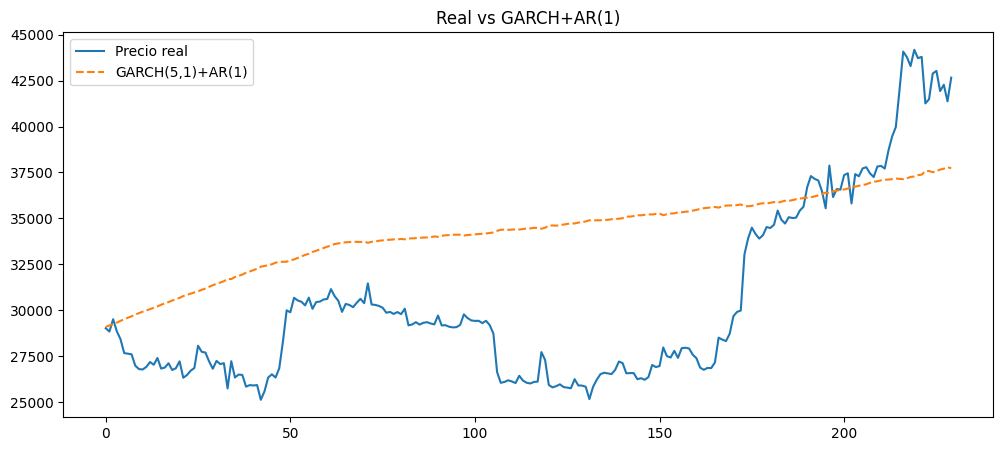

In [ ]:
# Predicción a un día vista 'Close+1'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna

import warnings
warnings.filterwarnings('ignore')

# — 1. Datos —
data = pd.read_csv('/content/drive/MyDrive/Dataset-Finbert2.csv', index_col='Date')

prices = data['Close'].dropna().reset_index(drop=True)
returns = prices.pct_change().dropna().reset_index(drop=True)
split = int(len(returns) * 0.8)
train_returns = returns[:split]
test_returns  = returns[split:]
last_price    = prices.iloc[split]

# — 2. Selección (p, q) con Optuna —
def objective(trial):
    p = trial.suggest_int('p', 1, 5)
    q = trial.suggest_int('q', 1, 5)
    try:
        history = train_returns.copy()
        predicted_returns = []

        for actual_r in test_returns:
            m = arch_model(history,
                           vol='GARCH', p=p, q=q,
                           mean='AR', lags=1,
                           dist='normal')
            fit = m.fit(disp='off')
            f1 = fit.forecast(horizon=1, reindex=False).mean.iloc[-1, 0]
            predicted_returns.append(f1)
            history = pd.concat([history, pd.Series([actual_r])], ignore_index=True)

        predicted_returns = np.array(predicted_returns)

        # Reconstrucción de precios
        predicted_prices = [last_price]
        for r in predicted_returns:
            predicted_prices.append(predicted_prices[-1] * (1 + r))
        predicted_prices = np.array(predicted_prices[1:])

        real_prices = prices.iloc[split : split + len(predicted_prices)].values
        rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
        return rmse
    except:
        return float('inf')

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=15)
best_p, best_q = study.best_params['p'], study.best_params['q']
print(f"Mejor GARCH({best_p},{best_q}) con AR(1) en la media")

# — 3. Forecast secuencial —
history = train_returns.copy()
predicted_returns = []
for actual_r in test_returns:
    m = arch_model(history,
                   vol='GARCH', p=best_p, q=best_q,
                   mean='AR', lags=1,    # AR(1) también aquí
                   dist='normal')
    fit = m.fit(disp='off')
    f1  = fit.forecast(horizon=1, reindex=False).mean.iloc[-1, 0]
    predicted_returns.append(f1)
    history = pd.concat([history, pd.Series([actual_r])], ignore_index=True)

predicted_returns = np.array(predicted_returns)

# — 4. Reconstruir precios —
predicted_prices = [last_price]
for r in predicted_returns:
    predicted_prices.append(predicted_prices[-1] * (1 + r))
predicted_prices = np.array(predicted_prices[1:])
real_prices      = prices.iloc[split : split + len(predicted_prices)].values

# — 5. Métrica y gráfica —
rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
mae = mean_absolute_error(real_prices, predicted_prices)
print(f"RMSE precios GARCH+AR(1): {rmse:.4f}")
print(f"MAE precios GARCH+AR(1): {mae:.4f}")

plt.figure(figsize=(12,5))
plt.plot(real_prices,    label='Precio real')
plt.plot(predicted_prices, '--', label=f'GARCH({best_p},{best_q})+AR(1)')
plt.legend(); plt.title("Real vs GARCH+AR(1)"); plt.show()


[I 2025-06-27 17:32:26,845] A new study created in memory with name: no-name-bc6e0078-138b-4a1c-9e1e-b58ad76f4479
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
[I 2025-06-27 17:32:51,876] Trial 0 finished with value: inf and parameters: {'p': 2, 'q': 2}. Best is trial 0 with value: inf.
[I 2025-06-27 17:33:14,268] Trial 1 finished with value: inf and parameters: {'p': 1, 'q': 2}. Best is trial 0 with value: inf.
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
[I 2025-06-27 17:33:31,582] Trial 2 finished with value: inf and parameters: {'p': 3, 'q': 3}. Best is trial 0 with value: inf.
/usr

Mejor GARCH(2,2) con AR(1) en la media


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


RMSE precios GARCH+AR(1) (15 días): 7373285.4810
MAE precios GARCH+AR(1) (15 días): 4161647.4772


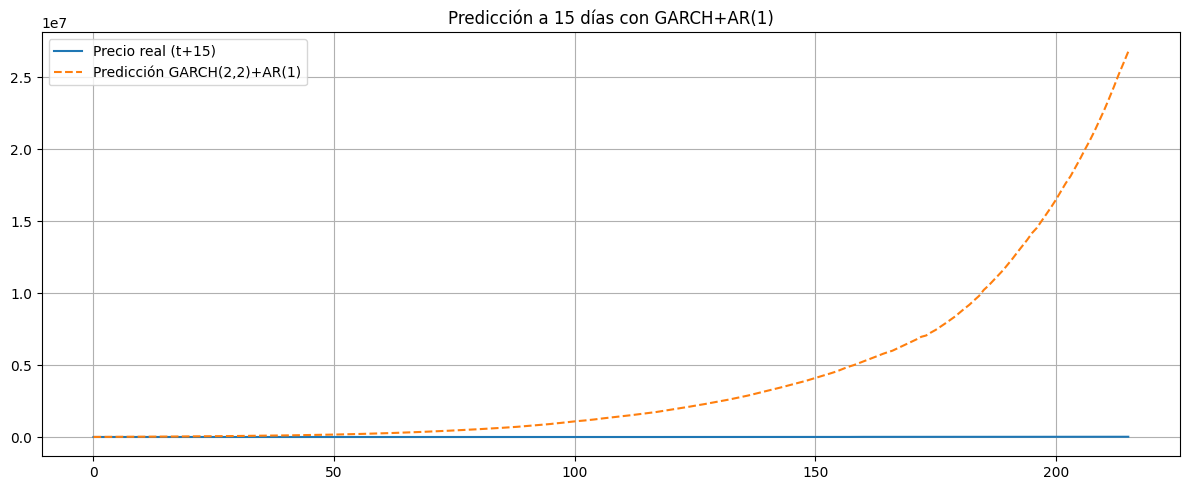

In [18]:
# Predicción a 15 días vista 'Close+15'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna

import warnings
warnings.filterwarnings('ignore')

# — 1. Datos —
data = pd.read_csv('/content/drive/MyDrive/Dataset-Finbert2.csv', index_col='Date')

prices = data['Close'].dropna().reset_index(drop=True)
returns = prices.pct_change().dropna().reset_index(drop=True)
split = int(len(returns) * 0.8)
train_returns = returns[:split]
test_returns  = returns[split:]
last_price    = prices.iloc[split]

# — 2. Selección (p, q) con Optuna —
def objective(trial):
    p = trial.suggest_int('p', 1, 5)
    q = trial.suggest_int('q', 1, 5)
    try:
        history = train_returns.copy()
        predicted_returns = []

        for i in range(len(test_returns) - 14):  # Previsión a 15 días
            m = arch_model(history, vol='GARCH', p=p, q=q, mean='AR', lags=1, dist='normal')
            fit = m.fit(disp='off')

            future_returns = fit.forecast(horizon=15, reindex=False).mean.values[-1]
            cumulative_return = np.prod(1 + future_returns) - 1
            predicted_returns.append(cumulative_return)

            history = pd.concat([history, pd.Series([test_returns.iloc[i]])], ignore_index=True)

        predicted_prices = [last_price]
        for r in predicted_returns:
            predicted_prices.append(predicted_prices[-1] * (1 + r))
        predicted_prices = np.array(predicted_prices[1:])

        rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
        return rmse
    except:
        return float('inf')

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=15)
best_p, best_q = study.best_params['p'], study.best_params['q']
print(f"Mejor GARCH({best_p},{best_q}) con AR(1) en la media")

# — 3. Forecast secuencial 15 días —
history = train_returns.copy()
predicted_returns = []

for i in range(len(test_returns) - 14):  # Para que haya 15 días futuros
    m = arch_model(history, vol='GARCH', p=best_p, q=best_q, mean='AR', lags=1, dist='normal')
    fit = m.fit(disp='off')

    # Retornos futuros t+1 a t+15
    future_returns = fit.forecast(horizon=15, reindex=False).mean.values[-1]

    # Retorno acumulado sobre 15 días
    cumulative_return = np.prod(1 + future_returns) - 1
    predicted_returns.append(cumulative_return)

    # Avanza 1 día con el retorno real
    history = pd.concat([history, pd.Series([test_returns.iloc[i]])], ignore_index=True)

# — 4. Reconstruir precios —
predicted_prices = [last_price]
for r in predicted_returns:
    predicted_prices.append(predicted_prices[-1] * (1 + r))
predicted_prices = np.array(predicted_prices[1:])

# Valores reales 15 días después
real_prices = prices.iloc[split + 15 : split + 15 + len(predicted_prices)].values

# — 5. Métrica y gráfica —
rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
mae = mean_absolute_error(real_prices, predicted_prices)
print(f"RMSE precios GARCH+AR(1) (15 días): {rmse:.4f}")
print(f"MAE precios GARCH+AR(1) (15 días): {mae:.4f}")

plt.figure(figsize=(12,5))
plt.plot(real_prices, label='Precio real (t+15)')
plt.plot(predicted_prices, '--', label=f'Predicción GARCH({best_p},{best_q})+AR(1)')
plt.legend()
plt.title("Predicción a 15 días con GARCH+AR(1)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Linear Regression

RMSE en test (Regresión Lineal): 4096.4745
MAE  en test (Regresión Lineal): 2744.1300


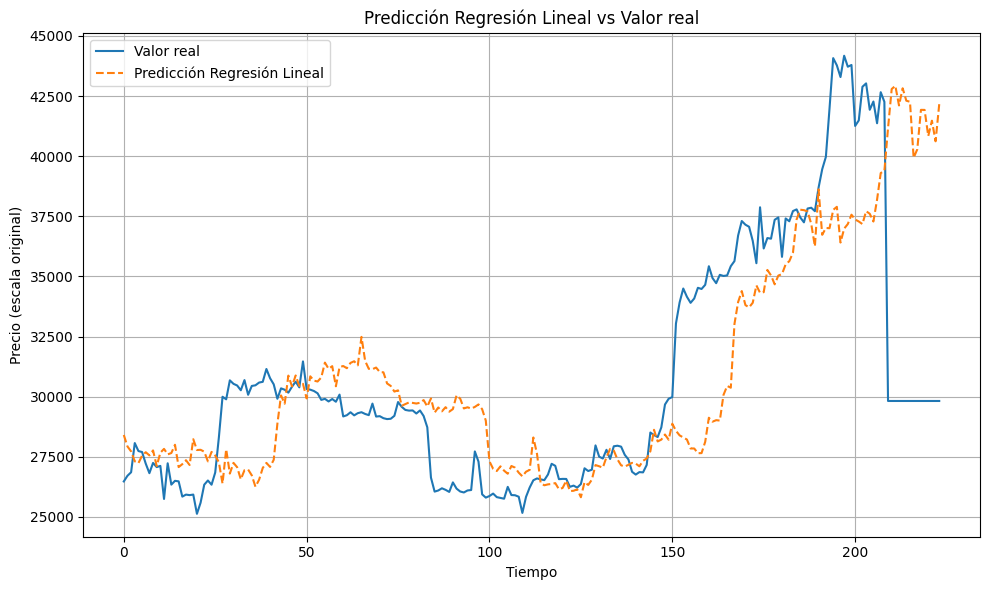

In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# ================================================
# 1. CARGA DE DATOS Y PREPROCESADO
# ================================================

# Carga de datos
data = pd.read_csv('/content/drive/MyDrive/Dataset-Finbert2.csv', index_col='Date')

# Selección de columnas
features = ['Close', 'Vol.', 'Change %']
target = 'Close+15'

# Escalado de features
feature_scaler = MinMaxScaler()
data[features] = feature_scaler.fit_transform(data[features])

# Creación de secuencias
def create_sequences(df, features, target, time_steps=30):
    X, y = [], []
    for i in range(len(df) - time_steps):
        X.append(df[features].iloc[i:i+time_steps].values)
        y.append(df[target].iloc[i+time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(data, features, target)

# División en train/test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ================================================
# 2. APLANADO DE SECUENCIAS PARA LINEAR REGRESSION
# ================================================

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# ================================================
# 3. ENTRENAMIENTO Y PREDICCIÓN
# ================================================

lr_model = LinearRegression()
lr_model.fit(X_train_flat, y_train)

lr_preds = lr_model.predict(X_test_flat)

# ================================================
# 4. EVALUACIÓN
# ================================================

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_mae = mean_absolute_error(y_test, lr_preds)

print(f"RMSE en test (Regresión Lineal): {lr_rmse:.4f}")
print(f"MAE  en test (Regresión Lineal): {lr_mae:.4f}")

# ================================================
# 5. VISUALIZACIÓN
# ================================================

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valor real')
plt.plot(lr_preds, '--', label='Predicción Regresión Lineal')
plt.title('Predicción Regresión Lineal vs Valor real')
plt.xlabel('Tiempo')
plt.ylabel('Precio (escala original)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### XGBoost

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
RMSE en test (XGBoost): 4011.5891
MAE  en test (XGBoost): 2983.9038


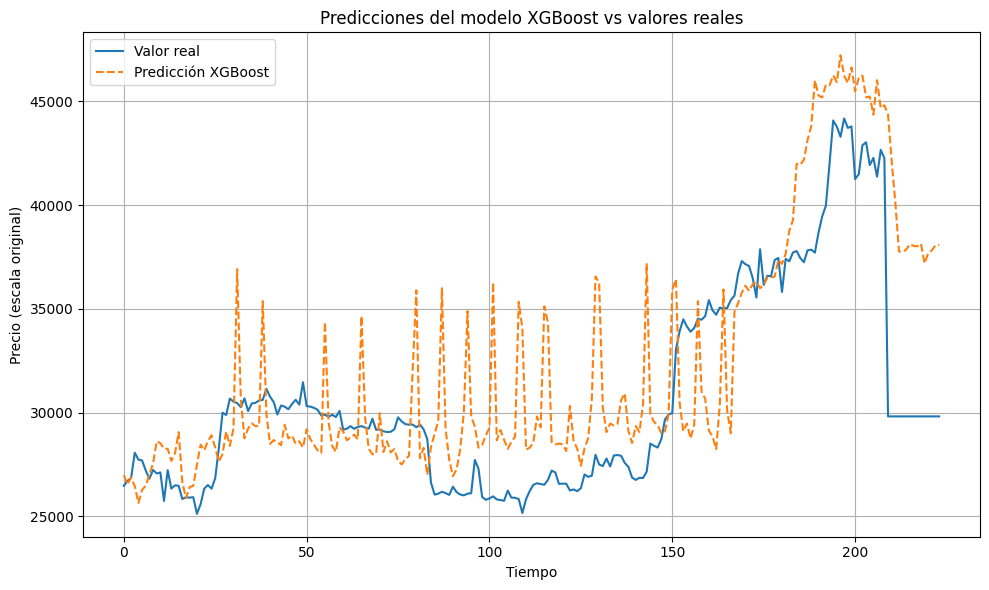

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# ================================================
# 1. CARGA DE DATOS Y PREPROCESADO
# ================================================

# Carga de datos
data = pd.read_csv('/content/drive/MyDrive/Dataset-Finbert2.csv', index_col='Date')

# Selección de columnas
features = ['Close', 'Vol.', 'Change %']
target = 'Close+15'

# Escalado de features
feature_scaler = MinMaxScaler()
data[features] = feature_scaler.fit_transform(data[features])

# Escalado del target
target_scaler = MinMaxScaler()
data[target] = target_scaler.fit_transform(data[[target]])

# Creación de secuencias
def create_sequences(df, features, target, time_steps=30):
    X, y = [], []
    for i in range(len(df) - time_steps):
        X.append(df[features].iloc[i:i+time_steps].values)
        y.append(df[target].iloc[i+time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(data, features, target)

# División en train/test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Invertimos target para métricas
y_test_rescaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# ================================================
# 2. APLANADO DE SECUENCIAS PARA XGBOOST
# ================================================

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# ================================================
# 3. ENTRENAMIENTO CON RANDOMIZED SEARCH
# ================================================

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train_flat, y_train)
xgb_best = random_search.best_estimator_

# ================================================
# 4. PREDICCIÓN Y EVALUACIÓN
# ================================================

# Predicción y desescalado
xgb_preds = xgb_best.predict(X_test_flat)
xgb_preds_rescaled = target_scaler.inverse_transform(xgb_preds.reshape(-1, 1))

# Métricas
xgb_rmse = np.sqrt(mean_squared_error(y_test_rescaled, xgb_preds_rescaled))
xgb_mae = mean_absolute_error(y_test_rescaled, xgb_preds_rescaled)

print(f"Mejores hiperparámetros XGBoost: {random_search.best_params_}")
print(f"RMSE en test (XGBoost): {xgb_rmse:.4f}")
print(f"MAE  en test (XGBoost): {xgb_mae:.4f}")

# ================================================
# 5. VISUALIZACIÓN
# ================================================

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Valor real')
plt.plot(xgb_preds_rescaled,'--', label='Predicción XGBoost')
plt.title('Predicciones del modelo XGBoost vs valores reales')
plt.xlabel('Tiempo')
plt.ylabel('Precio (escala original)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### LSTM

In [22]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 14.5 MB/s eta 0:00:00


[I 2025-06-27 12:58:48,443] A new study created in memory with name: no-name-ac3ea597-d007-448a-917d-b1a42f77615b
[I 2025-06-27 12:59:13,334] Trial 0 finished with value: 0.010123731568455696 and parameters: {'n_layers': 3, 'lstm_units': 128, 'dropout_rate': 0.3, 'dense_units': 64, 'learning_rate': 0.0029303007567221817}. Best is trial 0 with value: 0.010123731568455696.
[I 2025-06-27 12:59:37,562] Trial 1 finished with value: 0.0016415092395618558 and parameters: {'n_layers': 1, 'lstm_units': 128, 'dropout_rate': 0.0, 'dense_units': 96, 'learning_rate': 0.005724957994342844}. Best is trial 1 with value: 0.0016415092395618558.
[I 2025-06-27 13:00:32,983] Trial 2 finished with value: 0.003265984123572707 and parameters: {'n_layers': 3, 'lstm_units': 96, 'dropout_rate': 0.2, 'dense_units': 96, 'learning_rate': 0.005479430202675801}. Best is trial 1 with value: 0.0016415092395618558.
[I 2025-06-27 13:00:53,224] Trial 3 finished with value: 0.005364532116800547 and parameters: {'n_layers':

Mejores hiperparámetros encontrados:
{'n_layers': 1, 'lstm_units': 128, 'dropout_rate': 0.3, 'dense_units': 128, 'learning_rate': 0.00022732921455828538}
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.1874 - val_loss: 0.0170
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0864 - val_loss: 0.0045
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0392 - val_loss: 0.0182
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0352 - val_loss: 0.0072
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0268 - val_loss: 0.0026
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0217 - val_loss: 0.0020
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0194 - val_loss: 0.0017
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0195 - val_loss: 0.0017
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0187 - val_loss: 0.0017
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0181 - 

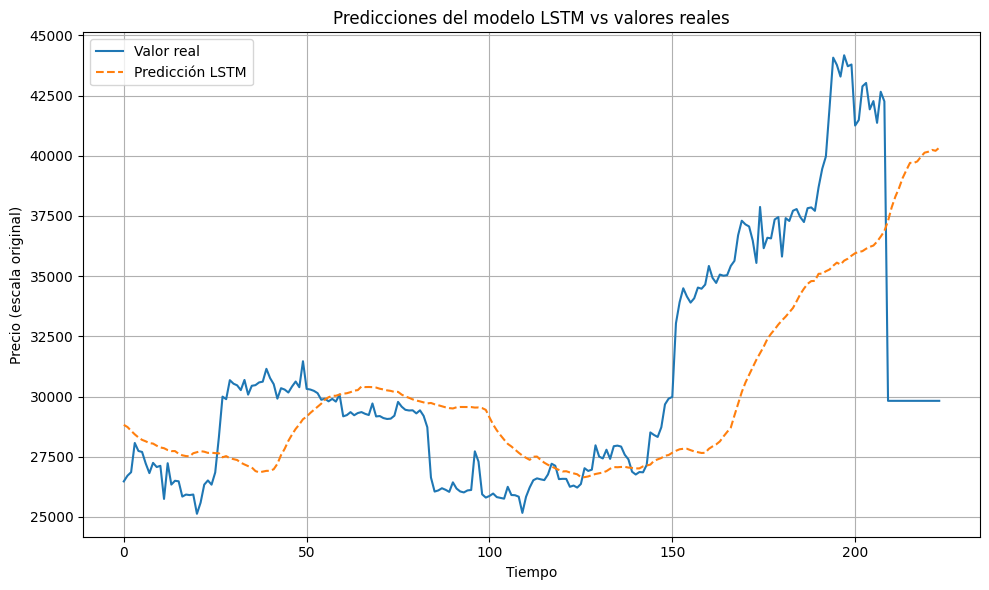

In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna


data = pd.read_csv('/content/drive/MyDrive/Dataset-Finbert2.csv', index_col='Date')

# Definimos features y target
features = ['Close', 'Vol.', 'Change %']
target = 'Close+15'

# Normalizamos las features
feature_scaler = MinMaxScaler()
data[features] = feature_scaler.fit_transform(data[features])

# Normalizamos también el target
target_scaler = MinMaxScaler()
data[target] = target_scaler.fit_transform(data[[target]])

# Creamos secuencias
def create_sequences(df, features, target, time_steps=30):
    X, y = [], []
    for i in range(len(df) - time_steps):
        X.append(df[features].iloc[i:i+time_steps].values)
        y.append(df[target].iloc[i+time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(data, features, target)

# División train/test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ======================================================
# 2. CONSTRUCCIÓN DEL MODELO
# ======================================================
def build_model(trial):
    time_steps = X_train.shape[1]
    num_features = X_train.shape[2]

    layers = trial.suggest_int('n_layers', 1, 3)
    lstm_units = trial.suggest_int('lstm_units', 32, 128, step=32)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.3, step=0.1)
    dense_units = trial.suggest_int('dense_units', 32, 128, step=32)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)

    inputs = Input(shape=(time_steps, num_features))
    x = inputs
    for i in range(layers):
        return_seq = (i < layers-1)
        x = LSTM(lstm_units, return_sequences=return_seq)(x)
        x = Dropout(dropout_rate)(x)
    x = Dense(dense_units, activation='relu')(x)
    output = Dense(1, activation='linear')(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

# ======================================================
# 3. OBJETIVO PARA OPTUNA
# ======================================================
def objective(trial):
    model = build_model(trial)
    early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        shuffle=False,  # Muy importante para series temporales
        epochs=100,
        batch_size=64,
        verbose=0,
        callbacks=[early_stop]
    )
    val_loss = history.history['val_loss'][-1]
    return val_loss

# ======================================================
# 4. BÚSQUEDA DE HIPERPARÁMETROS
# ======================================================
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

print("Mejores hiperparámetros encontrados:")
print(study.best_params)

# ======================================================
# 5. ENTRENAMIENTO FINAL
# ======================================================
best_model = build_model(study.best_trial)
early_stop_final = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    shuffle=False,
    verbose=1,
    validation_split=0.2,
    callbacks=[early_stop_final]
)

# ======================================================
# 6. PREDICCIÓN Y VISUALIZACIÓN
# ======================================================
preds = best_model.predict(X_test)

# Invertimos la normalización del target
preds_rescaled = target_scaler.inverse_transform(preds)
y_test_rescaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluación numérica
rmse = np.sqrt(mean_squared_error(y_test_rescaled, preds_rescaled))
mae = mean_absolute_error(y_test_rescaled, preds_rescaled)
print(f"RMSE en test (escala original): {rmse:.4f}")
print(f"MAE  en test (escala original): {mae:.4f}")

# Graficamos resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Valor real')
plt.plot(preds_rescaled,'--', label='Predicción LSTM')
plt.title('Predicciones del modelo LSTM vs valores reales')
plt.xlabel('Tiempo')
plt.ylabel('Precio (escala original)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


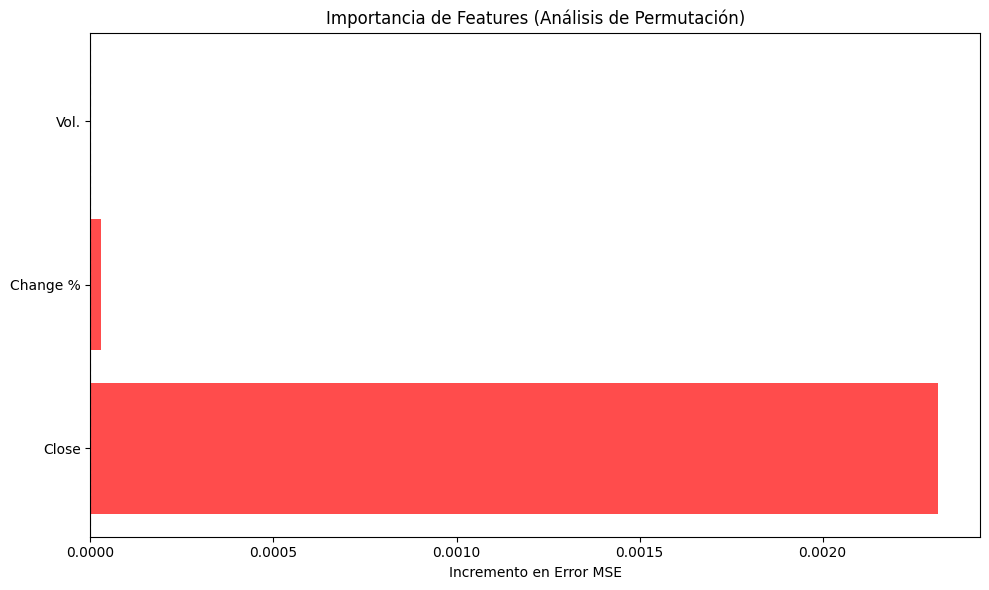


RESULTADOS:
1.        Close: 0.002314
2.     Change %: 0.000030
3.         Vol.: -0.000000


In [44]:
# Explicabilidad por permutación (alternativa a SHAP)
def aggregate_shap_importance(best_model, X_train, X_test, features, y_test):
    import warnings
    warnings.filterwarnings('ignore')

    baseline_score = best_model.evaluate(X_test, y_test, verbose=0)
    importances = []

    for i, feature_name in enumerate(features):
        X_permuted = X_test.copy()
        X_permuted[:, :, i] = np.random.permutation(X_permuted[:, :, i].flatten()).reshape(X_permuted[:, :, i].shape)

        permuted_score = best_model.evaluate(X_permuted, y_test, verbose=0)
        importance = permuted_score - baseline_score
        importances.append(importance)

    # Crear DataFrame y mostrar resultados
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    # Visualización
    plt.figure(figsize=(10, 6))
    colors = ['red' if x > 0 else 'green' for x in importance_df['Importance']]
    plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors, alpha=0.7)
    plt.xlabel('Incremento en Error MSE')
    plt.title('Importancia de Features (Análisis de Permutación)')
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    print("\nRESULTADOS:")
    for i, (_, row) in enumerate(importance_df.iterrows()):
        print(f"{i+1}. {row['Feature']:>12}: {row['Importance']:>8.6f}")

    return importance_df

results = aggregate_shap_importance(best_model, X_train, X_test, features, y_test)